Patrycja Biryło 1230032 <br>
Štěpán Zelenka 1230017 <br>
https://github.com/qettera/Machine-Learning-Overview

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score, confusion_matrix #, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from patsy import dmatrix
import statsmodels.api as sm
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


- [EDA](#1.-exploratory-data-analysis)  
- [Methods Application: LR, LDA and QDA](#2.-Methods-Application)  
- [Feature Selection](#3-feature-selection)  
- [Learning a non-linear function](#4-learning-a-non-linear-function)  
- [Decision Trees and Random Forest](#5-decision-trees-and-random-forest)  
- [Support Vector Machine](#6-support-vector-machine-svm)  
- [Principal Component Analysis](#7-principal-component-analysis-pca)

## 1. Exploratory Data Analysis

The mel frequency cepstral coefficients (MFCCs) of an audio signal are a small set of features (usually about 10–20) which describe the overall shape of the spectral envelope. MFCCs were frequently used for voice recognition before the task started to be performed using deep learning.

*for each sound: 13 means (media) and 13 standard deviations (desvio)*

In [75]:
import pandas as pd

# This is loading a csv which is a result of merging three csv files with car horn, gunshot and jackhammer MFCC data.
df = pd.read_csv('all.csv')

Let's have a look on our dataset first:

In [76]:
df.head(5)

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12,classe
0,4.677986,-1.966398,1.688301,-3.354441,1.043490,-1.798730,-0.767414,-1.614851,-0.185658,-0.029143,...,1.890468,1.410196,0.803002,1.311613,0.601646,0.769883,0.416295,0.564592,0.349746,car_horn
1,4.677564,-2.953498,1.426739,-2.261733,0.930528,-2.665626,-0.332971,-0.714048,0.139587,-0.898208,...,1.472251,2.427163,0.554742,0.577265,0.766374,0.758806,0.532139,0.454760,0.376218,car_horn
2,3.872289,-3.173699,1.931834,-1.202015,0.610031,-2.204595,-0.295343,-0.319409,-0.161939,-1.040936,...,1.159666,2.092606,0.540943,0.634752,0.439129,1.018796,0.385876,0.508423,0.394474,car_horn
3,5.160424,-3.750595,2.151555,-1.886166,1.334776,-2.151562,-0.546990,-0.359816,0.054898,-1.013008,...,1.627613,2.086991,0.654731,0.591023,0.497059,0.950790,0.567042,0.393286,0.332839,car_horn
4,2.252624,-3.644894,1.939464,-1.974539,1.823046,-1.844794,-1.132419,-0.942162,0.582952,-0.769522,...,2.167108,1.868980,1.226150,1.161215,1.018720,0.892772,0.453530,0.655595,0.546549,car_horn


**Class distribution**

Text(0, 0.5, '')

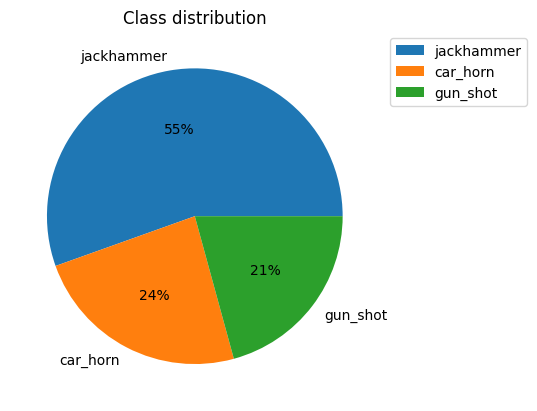

In [86]:
df2 = df['classe'].value_counts()

class_plot = df2.plot(kind= 'pie', autopct="%.0f%%")
class_plot.set_title('Class distribution')
class_plot.legend(bbox_to_anchor= (1.01, 1))
class_plot.set_ylabel('')

### Descriptive Statistics
We're going to start with the descriptive statistics to get an overview of the numerical columns in the dataset.

In [4]:
df.describe()

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,...,desvio3,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12
count,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,...,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000
mean,3.495076,-2.184187,1.073255,-0.698825,0.455421,-0.364949,0.287642,0.002218,0.228245,-0.124225,...,1.210243,1.095423,0.908105,0.852591,0.728579,0.674253,0.647240,0.578561,0.553523,0.356440
std,3.605594,1.792660,1.425874,0.954231,0.904173,0.801812,0.731956,0.645442,0.515347,0.523789,...,0.628151,0.552409,0.544199,0.438909,0.346493,0.289774,0.300969,0.251892,0.239224,0.066549
min,-4.672307,-9.984891,-5.472591,-4.068377,-4.362307,-3.794095,-2.701501,-1.856276,-2.150302,-2.626062,...,0.334159,0.295266,0.265892,0.280354,0.280959,0.136682,0.267503,0.190234,0.176745,0.163466
25%,0.401549,-3.338016,0.517790,-1.269979,-0.105763,-0.866011,-0.110261,-0.397775,-0.132682,-0.408994,...,0.745493,0.625401,0.545898,0.536299,0.489104,0.460650,0.462194,0.412720,0.388282,0.315536
50%,3.897727,-2.127124,1.070444,-0.717425,0.528501,-0.334075,0.367085,-0.010347,0.248138,-0.135857,...,1.072896,1.024874,0.753169,0.738506,0.622663,0.590892,0.570859,0.515397,0.484400,0.343735
75%,6.220131,-1.201787,1.952195,-0.131011,1.133396,0.188993,0.767006,0.394905,0.589735,0.170755,...,1.517922,1.464322,1.073476,1.030323,0.855334,0.806172,0.745861,0.666146,0.635796,0.380651
max,10.602967,2.943808,4.826087,2.914812,3.156123,2.050018,2.381640,2.096199,2.274243,1.788323,...,4.357339,3.719680,4.920654,3.605649,2.860202,1.935464,2.905896,2.263505,2.240934,1.069302


**Data types & missing values**

Next, we should check the data types of each column and see if there are any missing values.

In [5]:
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})

df_info

,Data Type,Missing Values,Unique Values
media0,float64,0,1803
media1,float64,0,1803
media2,float64,0,1803
media3,float64,0,1801
media4,float64,0,1803
media5,float64,0,1801
media6,float64,0,1803
media7,float64,0,1802
media8,float64,0,1801
media9,float64,0,1802


As we can see, dataset is in a very good condition: we have no missing values and all the values are numeric, so there is no need to clean the data.

### Univariate Analysis (Distribution of individual features)


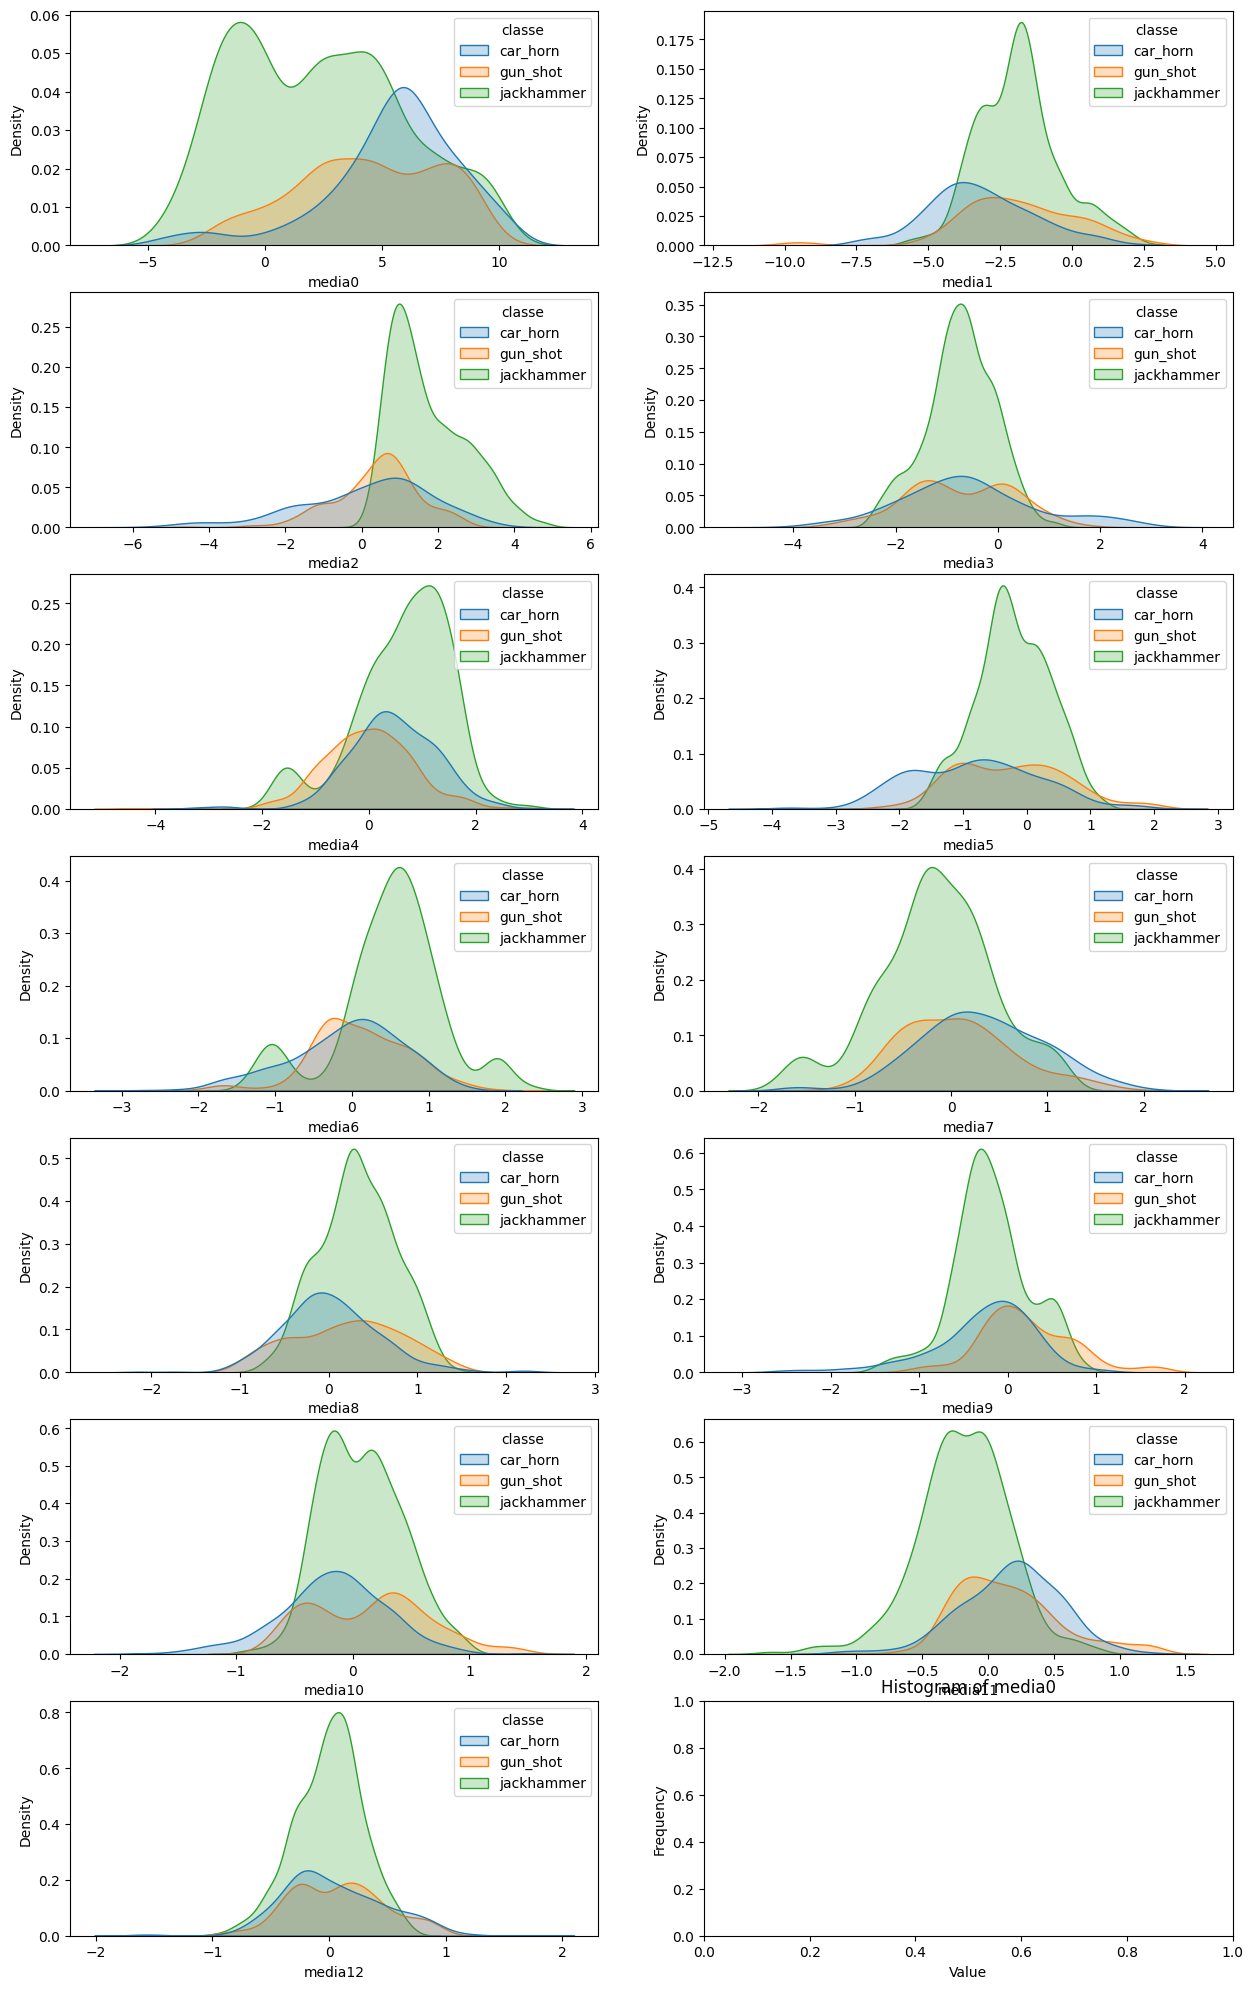

In [6]:
_, axes = plt.subplots(7, 2, figsize=(15,25))

for i in range(0, 7):
    sns.kdeplot(data=df, x='media' + str(i*2), hue='classe', shade=True, color='blue', ax=axes[i][0])
    if (i == 6):
        continue
    sns.kdeplot(data=df, x='media' + str(i*2 + 1), hue='classe', shade=True, color='blue', ax=axes[i][1])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of media0')
plt.show()

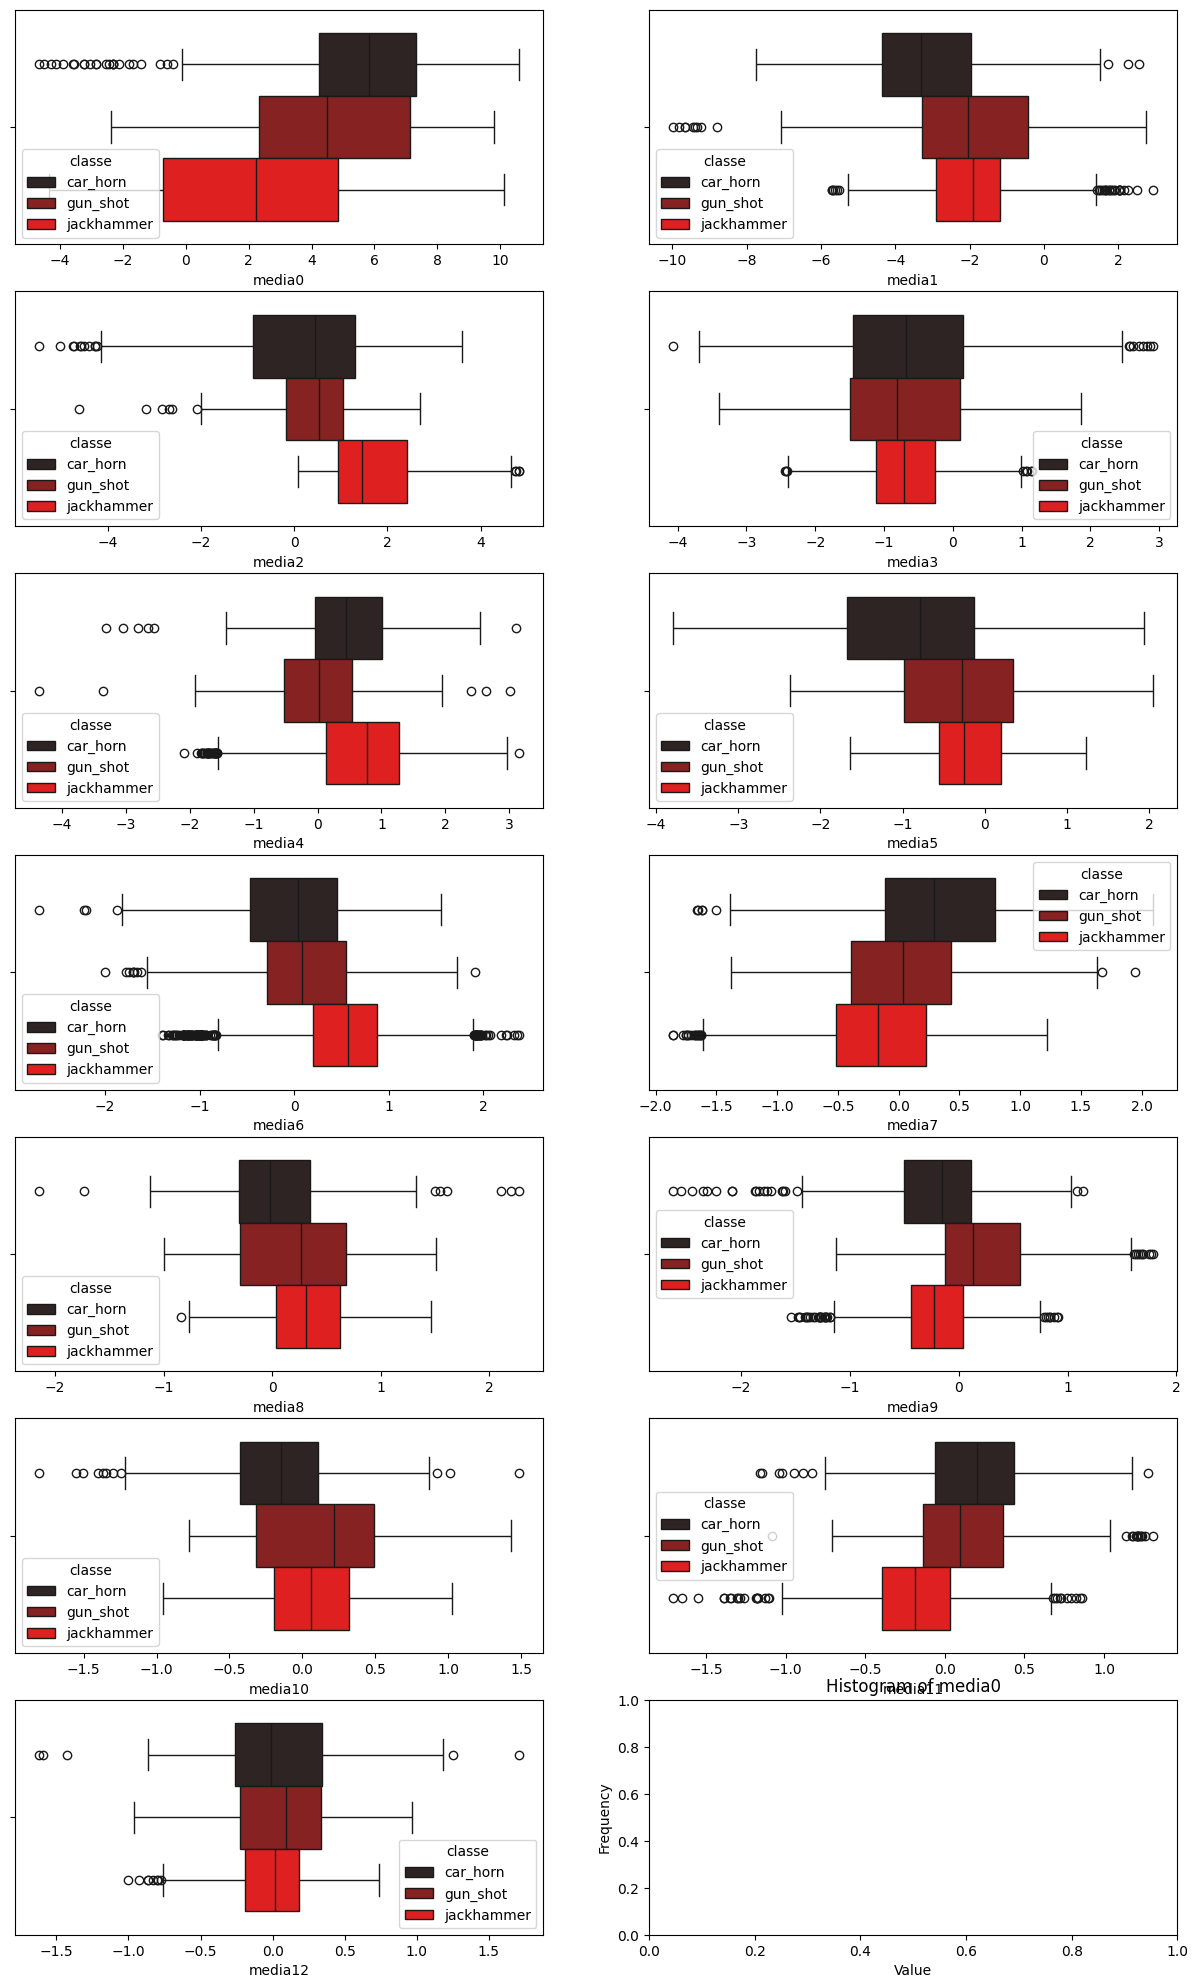

In [7]:
_, axes = plt.subplots(7, 2, figsize=(15,25))

for i in range(0, 7):
    sns.boxplot(data=df, x='media' + str(i*2), hue='classe', color='red', ax=axes[i][0])
    if (i == 6):
        continue
    sns.boxplot(data=df, x='media' + str(i*2 + 1), hue='classe', color='red', ax=axes[i][1])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of media0')
plt.show()

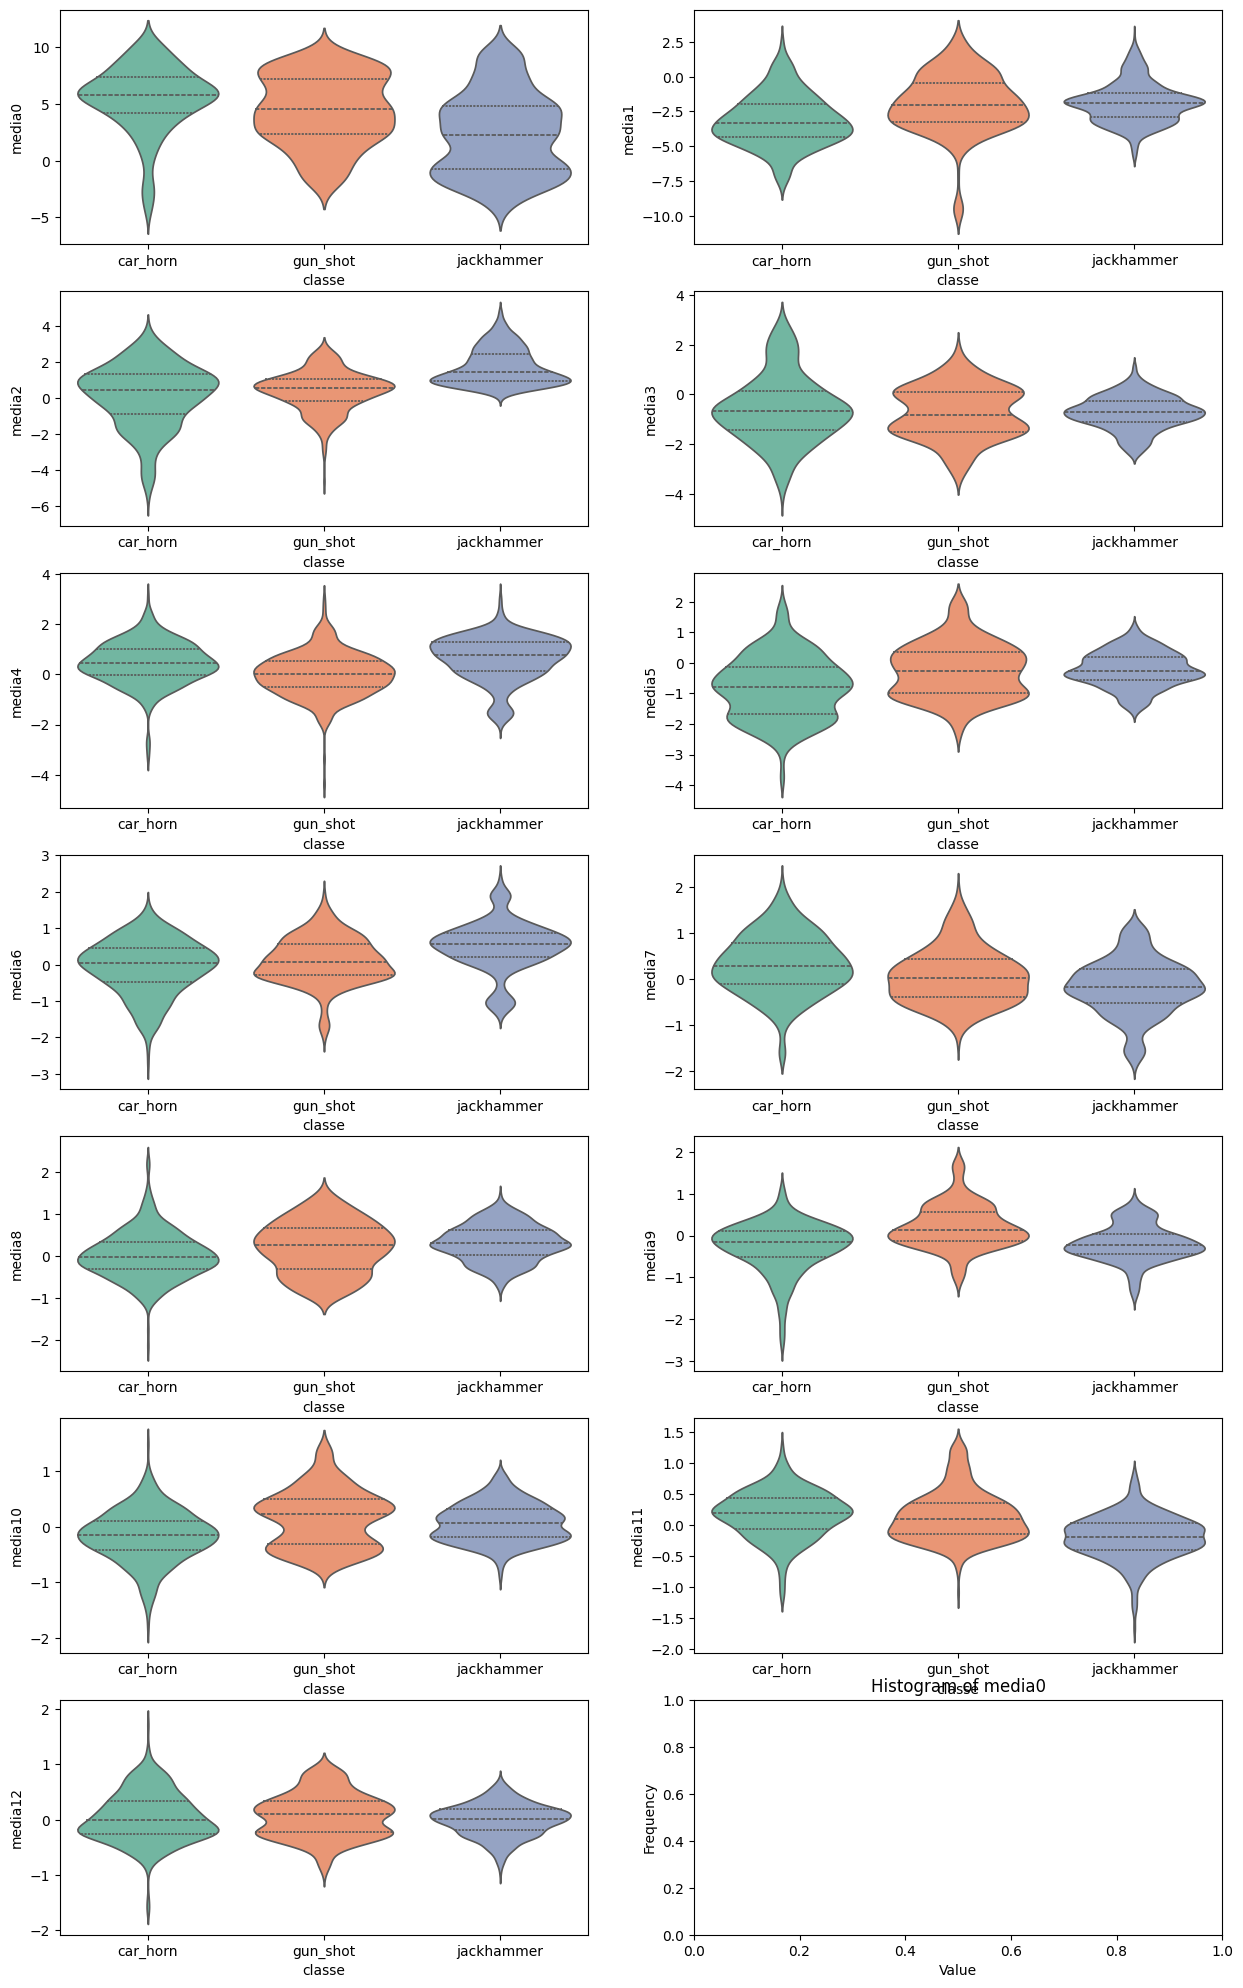

In [8]:
_, axes = plt.subplots(7, 2, figsize=(15,25))

for i in range(0, 7):
    sns.violinplot(data=df, x='classe', y='media' + str(i*2), inner='quart', palette='Set2', ax=axes[i][0])
    if (i == 6):
        continue
    sns.violinplot(data=df,x='classe', y='media' + str(i*2 + 1), inner='quart', palette='Set2', ax=axes[i][1])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of media0')
plt.show()

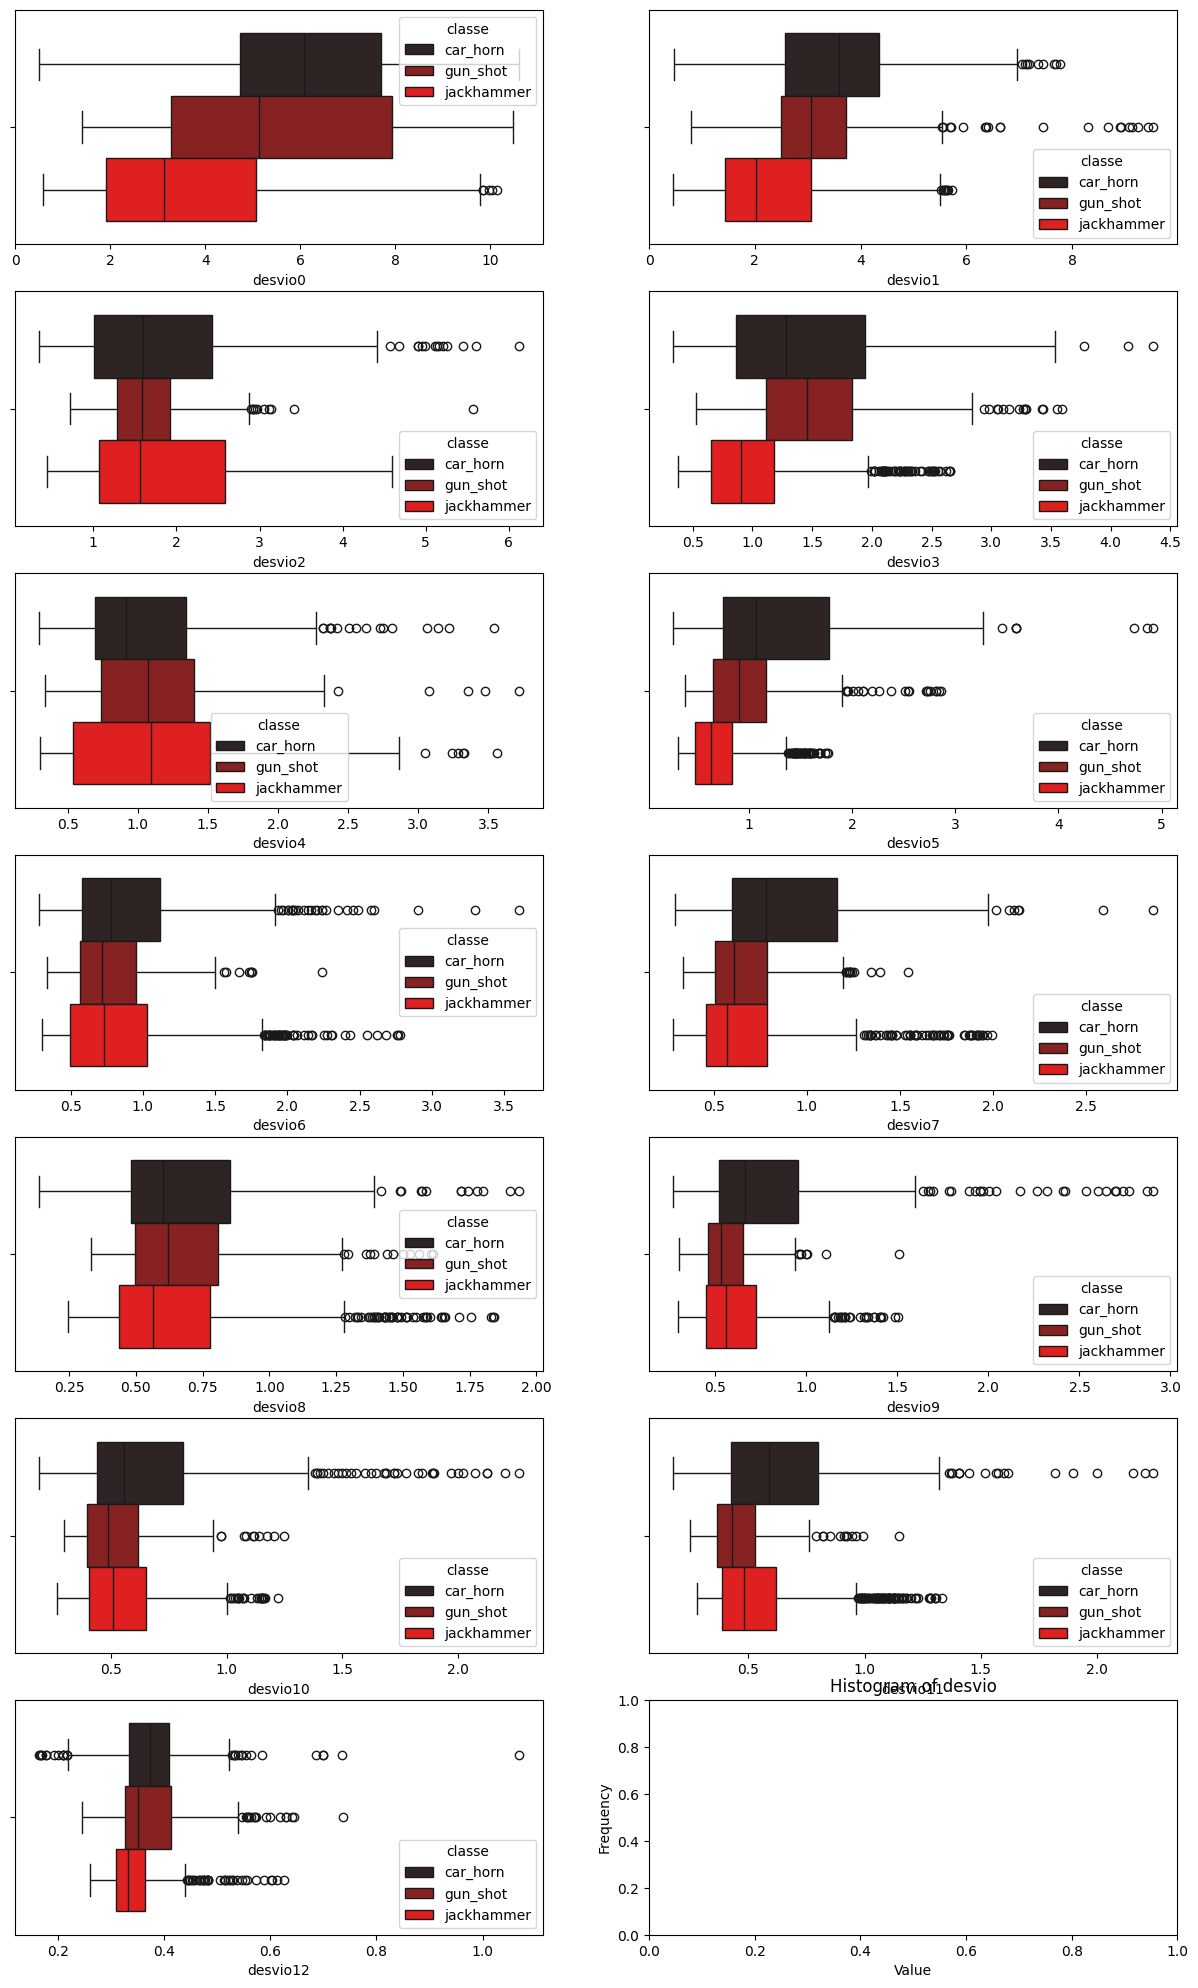

In [9]:
_, axes = plt.subplots(7, 2, figsize=(15,25))

for i in range(0, 7):
    sns.boxplot(data=df, x='desvio' + str(i*2), hue='classe', color='red', ax=axes[i][0])
    if (i == 6):
        continue
    sns.boxplot(data=df, x='desvio' + str(i*2 + 1), hue='classe', color='red', ax=axes[i][1])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of desvio')
plt.show()


### Bivariate Analysis (Correlation between features and the different target variables)
**In the bivariate analysis, we need to understand the relationship between the individual features and the target variable: class of the sound.**

Here, we will plot the relationship between each mean and standard deviation. We will differentiate each of the 3 classes with a different style and see how the values differ for each of the class.
The idea is to find some mean-std pairs where we can see the difference between the classes.

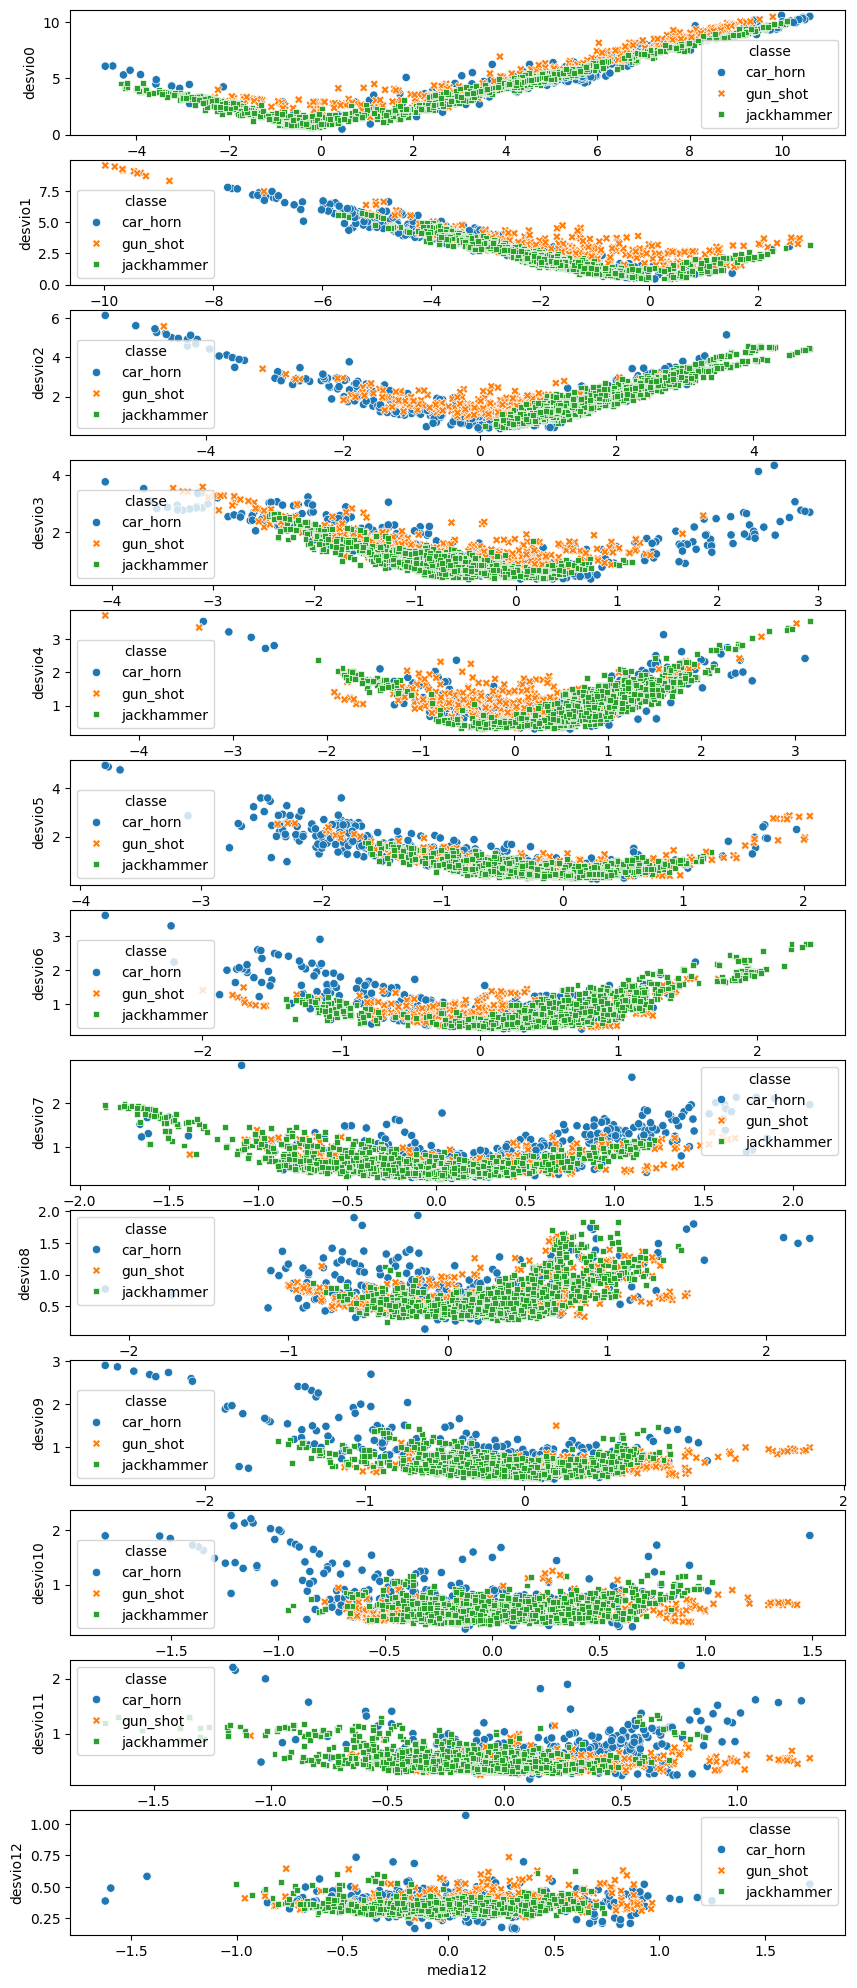

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(13, 1, figsize=(10,25))

for i in range(0,13):
    j = str(i)
    sns.scatterplot(data=df, x='media' + j, y='desvio' + j, ax=axes[i], hue='classe', style='classe')
plt.show()

From the graph, we see that some pairs have values very simillar for all the classes (e.g. the 1th or the 13th one), while in some we can see differences (namely 3rd one).
We can use this information to select (or maybe discard) the features that hold no information about the differences between each class.

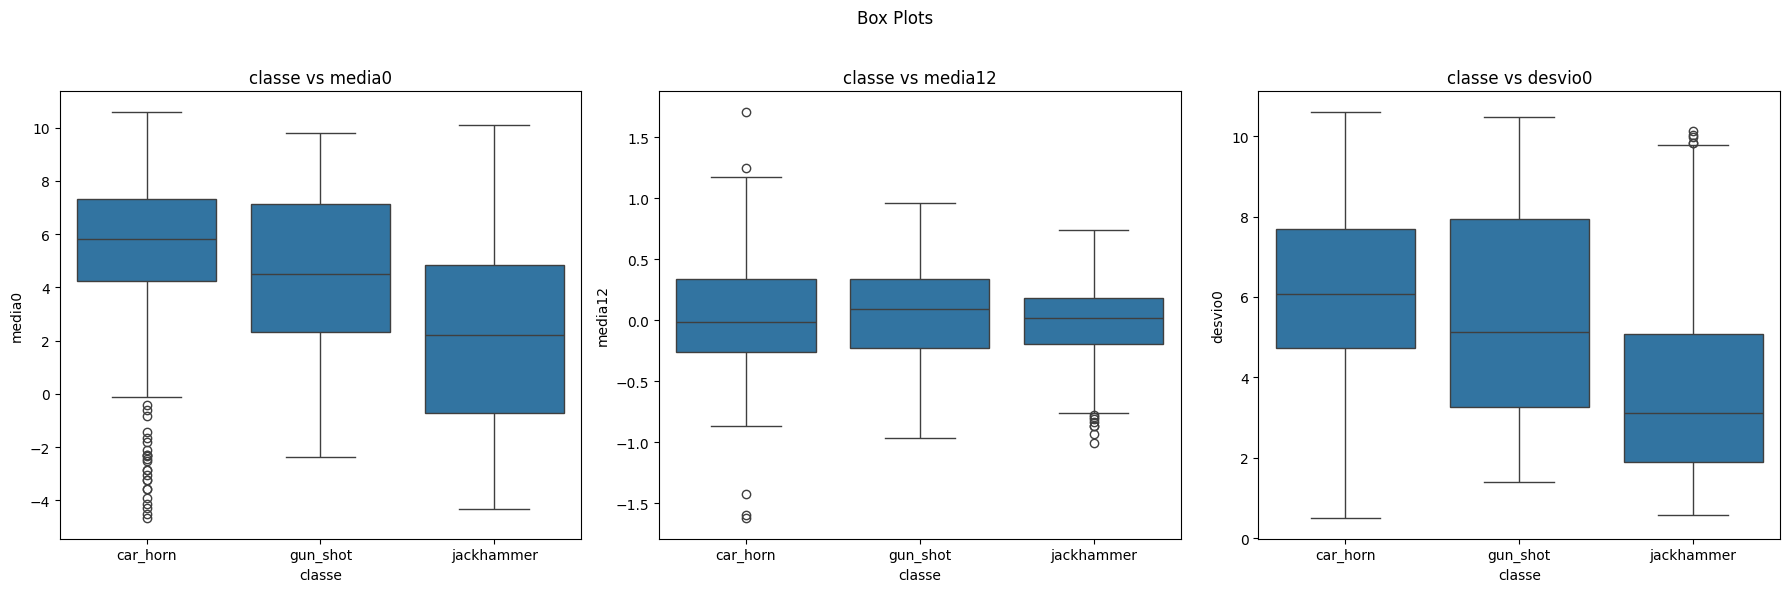

In [11]:
# Plot box plots for categorical variables vs charges
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Box Plots')

sns.boxplot(x='classe', y='media0', data=df, ax=axes[0])
axes[0].set_title('classe vs media0')

sns.boxplot(x='classe', y='media12', data=df, ax=axes[1])
axes[1].set_title('classe vs media12')

sns.boxplot(x='classe', y='desvio0', data=df, ax=axes[2])
axes[2].set_title('classe vs desvio0')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 2. Methods Application

Consider using the following methods: Logistic Regression, Linear Discriminant Analysis (LDA)
and Quadratic Discriminant Analysis (QDA). Applying the methods to the chosen data, try to
decide which method is most appropriate for the problem, giving reasons for your choice. Use the
following resampling methods for the various suggested models: <br>
• Holdout<br>
• Cross Validation (with k = 5 and k = 10)<br>
• Leave One Out Cross Validation (LOOCV)<br>
• Bootstrap<br>
Use the evaluation metrics that you find most appropriate to evaluate the results obtained
in each experiment. Analyzing the results obtained, indicate how the variance is affected by the
resampling methods used.

Before applying the evaluation method and metrics, we will split the dataset into features and target values, which will then utilized afterwards.

In [12]:
import pandas as pd

df = pd.read_csv('all.csv')

In [13]:
X = df.drop(['classe'], axis=1)
y = df['classe']

### Holdout

# TODO: wzory matematyczne dla 3 klas a nie 2 klas, dla 3 klas troche inaczej // mathematical formulas for 3 sound classes not 2 classes, (slightly different for 3 classes)**

For understanding the classification report and confusion matrix:  
*Precision* = $TP / (TP + FP)$  
*Recall* = $TP / (TP + FN)$  
*F1-Score* = $2 * (Precision * Recall) / (Precision + Recall)$  
*Accuracy* = $(TP + TN) / (TP + TN + FP + FN)$  
*Average vs Weighted Average* = Weighted average also considers the number of instaces for each class in the dataset

# TODO logistic regression pay attention only for 2 classes <br>
it works - but how and why<br>
maybe it divides 3 classes into binary problem like: car horn - 1, others - 0 soo**

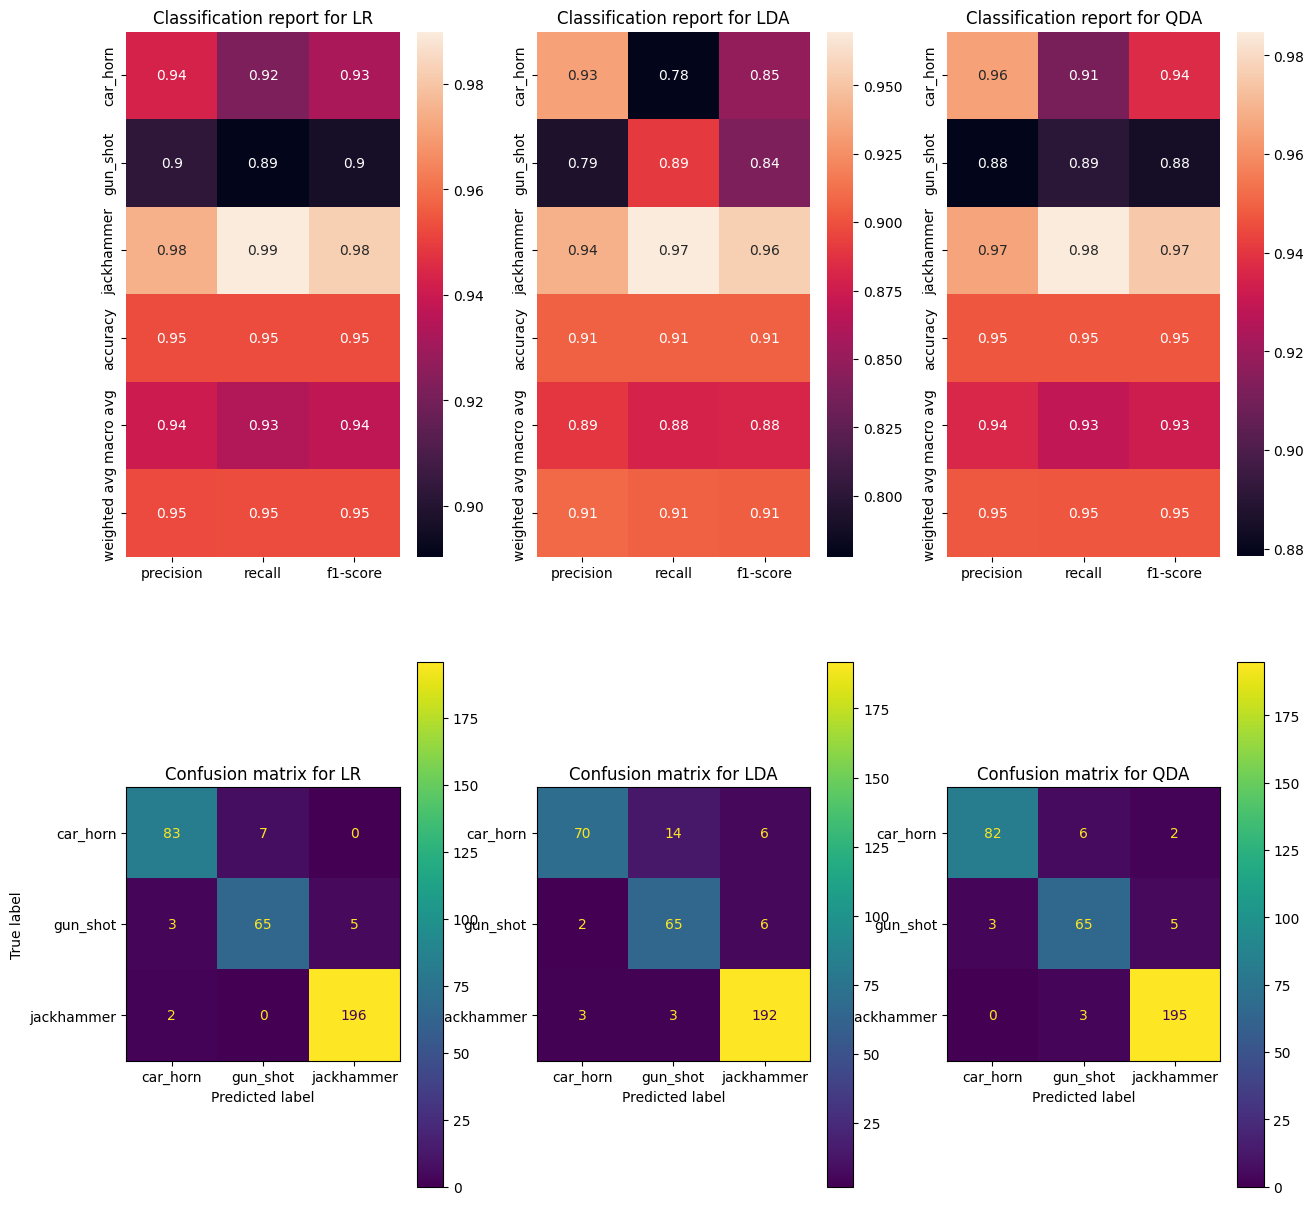

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {'LR':LogisticRegression(), 'LDA': LDA(), 'QDA': QDA()}


f, axes = plt.subplots(2, 3, figsize=(15, 15))

for idx, (name, model) in enumerate(models.items()):
    col = idx

    # Training the model
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Creating the metrics
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    clf_report = classification_report(y_test, y_pred, output_dict=True)

    # Plotting the metrics
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, ax=axes[0][col])
    axes[0][col].set_title(f'Classification report for {name}')
    
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    display.plot(ax=axes[1][col])
    axes[1][col].set_title(f'Confusion matrix for {name}')


Looking at the results, we see that LDA performed the worst, as it did mistake gunshot with carhorn a lot of the times, decreasing the recall for car_horn and precision for gun_shot quite substantially.
The performace of LR and QDA are quite comparable, altough QDA performed a bit better.  
Based on this test, __QDA__ is the best choice.

### Cross Validation
We will use the cross validation to evaluate each model's performance.

In [15]:
from sklearn.model_selection import cross_val_score, LeaveOneOut


print('Cross validation with cv=5')
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f'Results for {name}: Mean = {scores.mean()}, std = {scores.std()}')

print('\nCross validation with cv=10')
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10)
    print(f'Results for {name}: Mean = {scores.mean()}, std = {scores.std()}')

print('\nLeave One Out Cross validation (cv=1803)')
for name,model in models.items():
    loo = LeaveOneOut()
    scores = cross_val_score(model, X, y, cv=loo)
    print(f'Result for {name}: Mean = {scores.mean()}, std = {scores.std()}')

Cross validation with cv=5
Results for LR: Mean = 0.8074207448445676, std = 0.12109098986523116
Results for LDA: Mean = 0.753080947983995, std = 0.1235355638590949
Results for QDA: Mean = 0.7053662665435517, std = 0.09264621306584193

Cross validation with cv=10
Results for LR: Mean = 0.8546869244935543, std = 0.09107420613312885
Results for LDA: Mean = 0.8108624923265808, std = 0.10322106405234155
Results for QDA: Mean = 0.7902516881522406, std = 0.11053093425905197

Leave One Out Cross validation (cv=1803)
Result for LR: Mean = 0.9406544647809207, std = 0.23627027461921726
Result for LDA: Mean = 0.8901830282861897, std = 0.31266148537582705
Result for QDA: Mean = 0.9489739323349973, std = 0.22005092156964334


Based on the results from cross validation with $k=5$ and $k=10$, it would seem that __Logistic regression__ is the best choice.  
But assesing the model's performance with _LOOCV_, __QDA__ looks like the best choice, which is in agreement with the Holdout method.

### Bootstrap

In [16]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np


num_samples = 1000

bootstrap_scores = {
    'LR': [],
    'LDA': [],
    'QDA': []
}

for name, model in models.items():
    for _ in range(num_samples):
        X_bootstrap, y_bootstrap = resample(X_train, y_train, random_state=np.random.randint(1, 1000))
        
        model.fit(X_bootstrap, y_bootstrap)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        bootstrap_scores[name].append(accuracy)

In [17]:
for name, scores in bootstrap_scores.items():
    print(f'{name} mean = {np.mean(scores)}')

LR mean = 0.9457977839335181
LDA mean = 0.9133130193905817
QDA mean = 0.9527728531855956


From the _Bootstrap_ resampling technique, we once again see that __QDA__ is the best choice for our data.

## 3. Feature Selection
Can classification models obtain better results if they use just a few features instead of all available
features? Evaluate this hypothesis, using regularization methods.

***Classification models: logistic regression, LDA, QDA.***

elastic search

First, we're experimenting with feature selection methods for supervised machine learning.

In [100]:
import pandas as pd


df = pd.read_csv('all.csv')

X = df.drop(['classe'], axis=1)
y = df['classe']

### Compute the ANOVA F-value for the provided sample. It's a filter based method.

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


# create and fit feature selector
selector = SelectKBest(f_classif, k=5).fit(X, y)

# get columns to keep and create new dataframe with those only, also keep the names of the features
cols_idxs = selector.get_support(indices=True)
features_anova = X.iloc[:,cols_idxs]

Let's have a look on our chosen features.

In [5]:
features_anova.head(10)

,media2,media11,desvio0,desvio3,desvio5
0,1.688301,-0.742146,5.495128,2.949682,1.410196
1,1.426739,-0.515518,5.228143,2.075249,2.427163
2,1.931834,0.023983,4.417526,1.241013,2.092606
3,2.151555,-0.066345,5.463763,1.853812,2.086991
4,1.939464,-0.397490,3.637889,2.035043,1.868980
5,-1.926679,0.080584,7.516033,0.428750,0.431152
6,-2.703282,0.151515,7.696106,0.443893,0.814838
7,-0.162309,0.406305,6.069935,1.069494,0.423222
8,-0.996254,-0.949145,3.694728,1.406182,0.321814
9,1.721843,1.175394,8.665190,2.177040,1.980615


In [6]:
# Now for half of the features
selector = SelectKBest(f_classif, k=13).fit(X, y)

# get columns to keep and create new dataframe with those only, also keep the names of the features
cols_idxs = selector.get_support(indices=True)
features_anova_half = X.iloc[:,cols_idxs]

### Now we're choosing features with Recursive Feature Elimination. It's based on feature importance from a Support Vector Classifier. (wrapped-based method)

In [7]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

svc = SVC(kernel="linear") # very basic SVC just to see how it works
rfe = RFE(svc, n_features_to_select=5).fit(X, y)

cols_idxs = rfe.get_support(indices=True)
features_rfe = X.iloc[:,cols_idxs]

In [8]:
features_rfe.head(10)

,media2,media12,desvio2,desvio5,desvio11
0,1.688301,-0.550976,2.400241,1.410196,0.564592
1,1.426739,-0.361923,1.923683,2.427163,0.454760
2,1.931834,-0.250745,2.348993,2.092606,0.508423
3,2.151555,-0.172005,2.451514,2.086991,0.393286
4,1.939464,-0.185101,2.440087,1.868980,0.655595
5,-1.926679,-0.355585,1.738356,0.431152,0.586596
6,-2.703282,-0.044545,2.796408,0.814838,0.413624
7,-0.162309,0.458418,0.778339,0.423222,0.284565
8,-0.996254,-0.184435,1.135193,0.321814,0.837011
9,1.721843,-0.237778,2.300760,1.980615,1.565558


Both methods chose media2 as feature to keep.

In [9]:
# For half
svc = SVC(kernel="linear") # very basic SVC just to see how it works
rfe = RFE(svc, n_features_to_select=13).fit(X, y)

cols_idxs = rfe.get_support(indices=True)
features_rfe_half = X.iloc[:,cols_idxs]

### Choosing features based on correlation to the class

In [10]:
import pandas as pd
df = pd.read_csv('all.csv')

# car horn = 0, gunshot =1, jackhammer = 2
df['classe'].mask(df['classe'] == 'car_horn', 0, inplace=True)
df['classe'].mask(df['classe'] == 'gun_shot', 1, inplace=True)
df['classe'].mask(df['classe'] == 'jackhammer', 2, inplace=True)

In [11]:
df = df.astype('float') #so the heatmap function won't have problems with df being dtype='object'

Text(0.5, 1.0, 'Features correlating with classe')

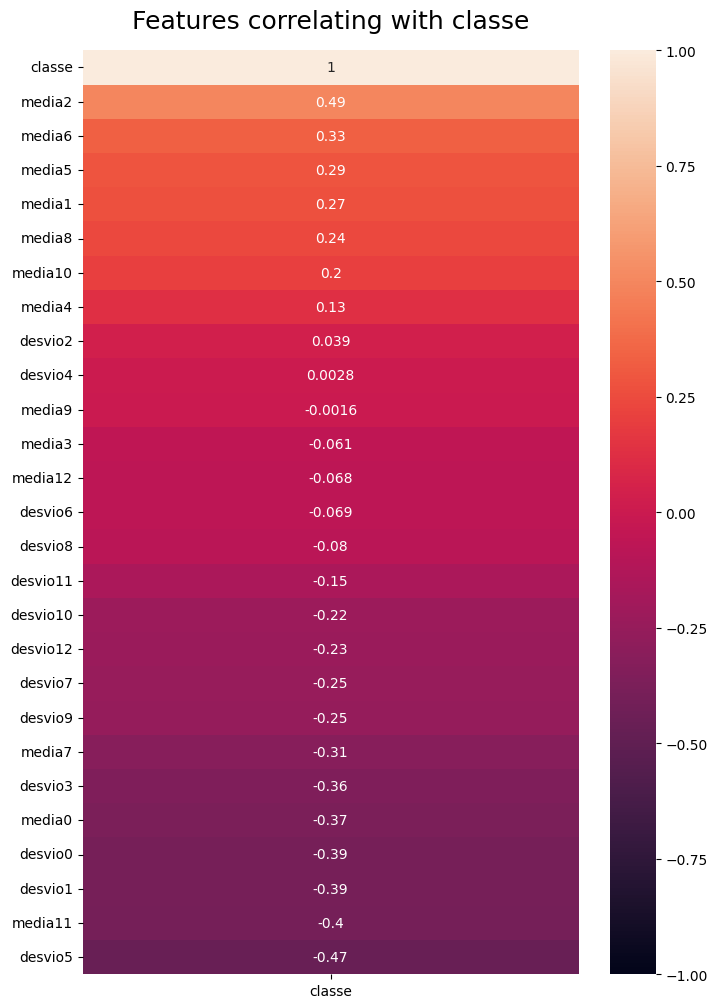

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['classe']].sort_values(by='classe', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features correlating with classe', fontdict={'fontsize':18}, pad=16)

So far, the media2 variable always appears in all methods.

In [13]:
# creating a dataset with top 5 features (highest correlation to the class)
features_corr = df[['media2', 'media5', 'media6', 'media1', 'media8', 'media10']]

In [14]:
features_corr_half = df[['media2', 'media5', 'media6', 'media1', 'media8', 'media10', 'media4', 'desvio2', 'desvio4', 'media9', 'media3', 'media12', 'desvio6']]

### Comparision

In [15]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA


In [16]:
import pandas as pd
df = pd.read_csv('all.csv')

In [17]:
y = df['classe']

In [51]:
def run_lr_lda_qda(x,y, features_name):
    x_train_chosen, x_test_chosen, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # since QDA is the best shot, lets use only it
    #models = {'LR':LogisticRegression(multi_class='ovr'), 'LDA': LDA(), 'QDA': QDA()}
    models = {'QDA': QDA()}

    result_list = []
    for idx, (name, model) in enumerate(models.items()):
        col = idx
        # Training the model
        model = model.fit(x_train_chosen, y_train)
        y_pred = model.predict(x_test_chosen)

        #print("Model: "+ name)
        r_sq = model.score(x_train_chosen, y_train)
        #print(f"coefficient of determination: {r_sq}")
        #print(classification_report(y_test, y_pred))

        result_list.append({'model': model, 
                            'features': features_name, 
                            'coefficient of determination': r_sq}
                            )
        # result_dict['model'] = model
        # result_dict['features'] = features_name
        # result_dict['coefficient of determination'] = r_sq


    return result_list

In [52]:
results_df = []

In [53]:
results_df.append(run_lr_lda_qda(features_anova, y, 'features_anova'))

In [54]:
results_df.append(run_lr_lda_qda(features_rfe, y, 'features_rfe'))

In [55]:
results_df.append(run_lr_lda_qda(features_corr, y, 'features_corr'))

Now let's check how about half of the features.

***On half of variables***

In [56]:
results_df.append(run_lr_lda_qda(features_corr_half, y, 'features_corr_half'))

In [57]:
results_df.append(run_lr_lda_qda(features_anova_half, y, 'features_anova_half'))

In [58]:
results_df.append(run_lr_lda_qda(features_rfe_half, y, 'features_rfe_half'))

***Regualization: Ridge Classifier***

rigde classifier <br>
they are used to choose which features are the best for the classification <br>
NOT? to evaluate already chosen set of features

**Lasso is for regression problems**

In [59]:
# mean_squared_error jest do klasyfikacji jak mam dwie klasy nie 3, do 3 trzeba confusion matrix


In [101]:
from sklearn.model_selection import train_test_split

df2 = df.copy(deep=True)

df2['classe'].mask(df2['classe'] == 'car_horn', 0, inplace=True)
df2['classe'].mask(df2['classe'] == 'gun_shot', 1, inplace=True)
df2['classe'].mask(df2['classe'] == 'jackhammer', 2, inplace=True)

y2 = df2['classe']
y = df['classe']

X = df.drop(['classe'], axis=1)

x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

https://medium.com/@sabarirajan.kumarappan/feature-selection-by-lasso-and-ridge-regression-python-code-examples-1e8ab451b94b

we will do the model fitting and feature selection, altogether in one line of code. we use Lasso (L1) penalty for feature selection and we use the sklearn.SelectFromModel to select the features with non-zero coefficients

https://medium.com/@agrawalsam1997/feature-selection-using-lasso-regression-10f49c973f08

In [122]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

In [139]:
# parameters to be tested on GridSearchCV to find the best alpha parameterr
params = {"alpha":np.arange(0.0000000001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y2)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-10}


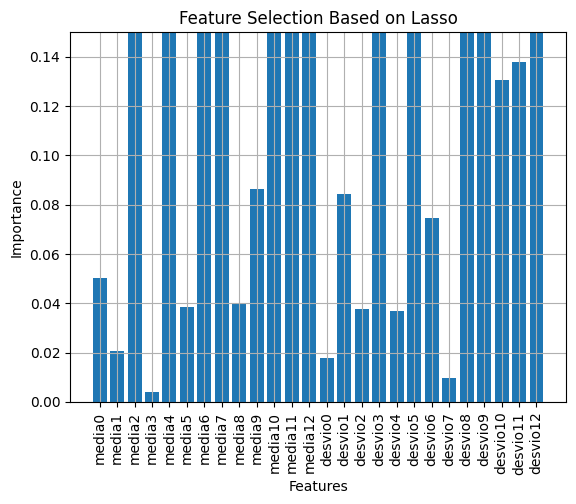

In [140]:
names=df.drop("classe", axis=1).columns


# calling the model with the best parameter
lasso1 = Lasso(alpha=0.0000000001)
lasso1.fit(x_train, y_train2)

# Using np.abs() to make coefficients positive 
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns. 
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [138]:
# Subsetting the features which has more than 0.1 importance.
feature_subset=np.array(names)[lasso1_coef>0.1]
print("Selected Feature Columns: {}".format(feature_subset))

Selected Feature Columns: ['media2' 'media4' 'media6' 'media7' 'media10' 'media11' 'media12'
 'desvio3' 'desvio5' 'desvio8' 'desvio9' 'desvio10' 'desvio11' 'desvio12']


In [126]:
df_new = df[feature_subset]
df_new

,media2,media4,media6,media7,media10,media11,media12,desvio3,desvio5,desvio8,desvio9,desvio10,desvio11,desvio12
0,1.688301,1.043490,-0.767414,-1.614851,-0.400619,-0.742146,-0.550976,2.949682,1.410196,0.601646,0.769883,0.416295,0.564592,0.349746
1,1.426739,0.930528,-0.332971,-0.714048,-0.069456,-0.515518,-0.361923,2.075249,2.427163,0.766374,0.758806,0.532139,0.454760,0.376218
2,1.931834,0.610031,-0.295343,-0.319409,-0.305191,0.023983,-0.250745,1.241013,2.092606,0.439129,1.018796,0.385876,0.508423,0.394474
3,2.151555,1.334776,-0.546990,-0.359816,-0.501346,-0.066345,-0.172005,1.853812,2.086991,0.497059,0.950790,0.567042,0.393286,0.332839
4,1.939464,1.823046,-1.132419,-0.942162,-0.330539,-0.397490,-0.185101,2.035043,1.868980,1.018720,0.892772,0.453530,0.655595,0.546549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,2.750922,1.024479,0.886541,-0.118320,-0.341208,-0.339844,-0.057822,0.649900,0.412725,0.557721,0.840733,0.464887,0.440423,0.380430
1799,2.582896,1.154879,0.875659,-0.034349,-0.376332,-0.360549,-0.146454,0.621607,0.398208,0.452882,0.911756,0.463412,0.399843,0.360946
1800,2.829893,1.173357,1.047330,-0.043917,-0.465519,-0.380075,0.000949,0.665319,0.411532,0.590638,0.793596,0.592795,0.512649,0.391974
1801,2.943084,1.277754,0.916639,0.034631,-0.512607,-0.335728,0.005052,0.844433,0.484439,0.648040,0.664538,0.634720,0.484224,0.366048


lasso 2
zle bo regresyjne jest

In [127]:
from sklearn.feature_selection import SelectFromModel



sel_ = SelectFromModel(Lasso(alpha=0.00001, random_state=10))
sel_.fit(x_train, y_train2)

SelectFromModel(estimator=Lasso(alpha=1e-05, random_state=10))

In [129]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [128]:
sel_.get_feature_names_out()

array(['media0', 'media1', 'media2', 'media3', 'media4', 'media5',
       'media6', 'media7', 'media8', 'media9', 'media10', 'media11',
       'media12', 'desvio0', 'desvio1', 'desvio2', 'desvio3', 'desvio4',
       'desvio5', 'desvio6', 'desvio7', 'desvio8', 'desvio9', 'desvio10',
       'desvio11', 'desvio12'], dtype=object)

In [102]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
import numpy as np



# classifier approach fix it

sel_ = SelectFromModel(Lasso())
sel_.fit(x_train, np.ravel(y_train2, order='C'))
sel_.get_support()
X_train = pd.DataFrame(x_train)

In [103]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 26
selected features: 1
features with coefficients shrank to zero: 25


In [104]:
selected_feat

Index(['media0'], dtype='object')

All of the features were selected. So, its not working the best. Let's skip it.

If you want to use Ridge regularization pick penalty=’l2'.

In [105]:
from sklearn.linear_model import RidgeClassifier #rigde classifier!
from sklearn.metrics import confusion_matrix

ridge = RidgeClassifier()
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

print(confusion_matrix(y_test, y_pred_ridge))


[[ 72  11   7]
 [  2  65   6]
 [  2   1 195]]


In [106]:
sel_2 = SelectFromModel(RidgeClassifier())
sel_2.fit(x_train, np.ravel(y_train, order='C'))
sel_2.get_support()

array([False, False, False, False,  True, False, False,  True, False,
        True, False,  True,  True, False, False, False,  True, False,
        True, False, False, False,  True,  True,  True,  True])

In [107]:
selected_feat2 = X_train.columns[(sel_2.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat2)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_2.estimator_.coef_ == 0)))

total features: 26
selected features: 11
features with coefficients shrank to zero: 0


In [108]:
selected_feat2

Index(['media4', 'media7', 'media9', 'media11', 'media12', 'desvio3',
       'desvio5', 'desvio9', 'desvio10', 'desvio11', 'desvio12'],
      dtype='object')

In [109]:
selected_feat_df_ridge = df.loc[:, selected_feat2]

In [110]:
selected_feat_df_ridge.columns

Index(['media4', 'media7', 'media9', 'media11', 'media12', 'desvio3',
       'desvio5', 'desvio9', 'desvio10', 'desvio11', 'desvio12'],
      dtype='object')

In [111]:
selected_feat_df_ridge

,media4,media7,media9,media11,media12,desvio3,desvio5,desvio9,desvio10,desvio11,desvio12
0,1.043490,-1.614851,-0.029143,-0.742146,-0.550976,2.949682,1.410196,0.769883,0.416295,0.564592,0.349746
1,0.930528,-0.714048,-0.898208,-0.515518,-0.361923,2.075249,2.427163,0.758806,0.532139,0.454760,0.376218
2,0.610031,-0.319409,-1.040936,0.023983,-0.250745,1.241013,2.092606,1.018796,0.385876,0.508423,0.394474
3,1.334776,-0.359816,-1.013008,-0.066345,-0.172005,1.853812,2.086991,0.950790,0.567042,0.393286,0.332839
4,1.823046,-0.942162,-0.769522,-0.397490,-0.185101,2.035043,1.868980,0.892772,0.453530,0.655595,0.546549
...,...,...,...,...,...,...,...,...,...,...,...
1798,1.024479,-0.118320,0.682083,-0.339844,-0.057822,0.649900,0.412725,0.840733,0.464887,0.440423,0.380430
1799,1.154879,-0.034349,0.660132,-0.360549,-0.146454,0.621607,0.398208,0.911756,0.463412,0.399843,0.360946
1800,1.173357,-0.043917,0.647831,-0.380075,0.000949,0.665319,0.411532,0.793596,0.592795,0.512649,0.391974
1801,1.277754,0.034631,0.429055,-0.335728,0.005052,0.844433,0.484439,0.664538,0.634720,0.484224,0.366048


In [112]:
results_df.append(run_lr_lda_qda(selected_feat_df_ridge, y, 'features_ridge'))

***On all data***

In [72]:
x = df.drop(['classe'], axis=1)

results_df.append(run_lr_lda_qda(x, y, 'all_features'))

In [73]:
results_df =  [item for row in results_df for item in row]

In [74]:
df_result = pd.DataFrame.from_dict(results_df)
df_result.sort_values(by='coefficient of determination', ascending=False)

,model,features,coefficient of determination
7,QuadraticDiscriminantAnalysis(),all_features,0.957004
4,QuadraticDiscriminantAnalysis(),features_anova_half,0.923717
5,QuadraticDiscriminantAnalysis(),features_rfe_half,0.912621
3,QuadraticDiscriminantAnalysis(),features_corr_half,0.896671
6,QuadraticDiscriminantAnalysis(),features_ridge,0.834951
0,QuadraticDiscriminantAnalysis(),features_anova,0.829404
1,QuadraticDiscriminantAnalysis(),features_rfe,0.816921
2,QuadraticDiscriminantAnalysis(),features_corr,0.807212


## 4. Learning a non-linear function


Use Generalized Additive Models (GAMs) to perform binary classification of your dataset. To do
this, you must try to build a model that allows you, among the three classes under analysis, to
identify one of them. You should test the three hypotheses and present only the one with the best
results. To validate the performance of the models, use cross-validation. Evaluate the results using
the evaluation metrics that you consider appropriate.


**We'll try to indentify whenever sound is a car_horn (1.0) or not (0.0)**

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('all.csv')

#change the class names to 1/0 values
df['classe'].mask(df['classe'] == 'car_horn', 1.0, inplace=True)
df['classe'].mask(df['classe'] == 'gun_shot', 0.0, inplace=True)
df['classe'].mask(df['classe'] == 'jackhammer', 0.0, inplace=True)

y = df[['classe']]
x = df.drop(['classe'], axis=1)

x_train_df,x_test_df, y_train_df, y_test_df = train_test_split(x, y, test_size=0.2, random_state=42)

x_train = x_train_df.to_numpy()
x_test = x_test_df.to_numpy()
y_train = y_train_df.to_numpy()
y_test = y_test_df.to_numpy()

**Make sure there is no null values, so gam.grindsearch will no throw 'SVD did not coverage'**

In [41]:
pd.isnull(df).any()

media0      False
media1      False
media2      False
media3      False
media4      False
media5      False
media6      False
media7      False
media8      False
media9      False
media10     False
media11     False
media12     False
desvio0     False
desvio1     False
desvio2     False
desvio3     False
desvio4     False
desvio5     False
desvio6     False
desvio7     False
desvio8     False
desvio9     False
desvio10    False
desvio11    False
desvio12    False
classe      False
dtype: bool

**Prepare function for plotting**

In [42]:
import matplotlib.pyplot as plt

def plot_partial_dependence(gam_model, nr_of_plots):
    titles = list(x.columns)
    plt.figure()
    fig, axs = plt.subplots(1,nr_of_plots,figsize=(20, 5))
    for i, ax in enumerate(axs):
        XX = gam_model.generate_X_grid(term=i)
        ax.plot(XX[:, i], gam_model.partial_dependence(term=i, X=XX))
        ax.plot(XX[:, i], gam_model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
        if i == 0:
            ax.set_ylim(-30,30)
        ax.set_title(titles[i])

## GAMs use smoothing functions to model relationships between predictors and the response. Select appropriate smoothing functions, such as cubic splines or thin-plate splines, based on the nature of your data and the expected relationships.

Here we use LogisticGAM, which uses a logit link function and binomial distribution, with 26 spline terms, one for each of the features

In [44]:
from pygam import LogisticGAM, s, f, te
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [45]:
gam3 = LogisticGAM(n_splines=26).gridsearch(x_train, y_train)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:21 ETA:   0:03:32
 18% (2 of 11) |####                     | Elapsed Time: 0:00:27 ETA:   0:00:58
 27% (3 of 11) |######                   | Elapsed Time: 0:00:34 ETA:   0:00:53
 36% (4 of 11) |#########                | Elapsed Time: 0:00:41 ETA:   0:00:49
 45% (5 of 11) |###########              | Elapsed Time: 0:00:48 ETA:   0:00:43
 54% (6 of 11) |#############            | Elapsed Time: 0:00:55 ETA:   0:00:35
 63% (7 of 11) |###############          | Elapsed Time: 0:01:03 ETA:   0:00:28
 72% (8 of 11) |##################       | Elapsed Time: 0:01:10 ETA:   0:00:21
 81% (9 of 11) |####################     | Elapsed Time: 0:01:15 ETA:   0:00:11
 90% (10 of 11) |#####################   | Elapsed Time: 0:01:21 ETA:   0:00:05
100% (11 of 11) |########################| Elapsed Time: 0:01:27 Time:  0:01:27


In [46]:
gam3.accuracy(x_test, y_test)

0.9722991689750693

In [ ]:
gam3.summary()

In [47]:
import matplotlib.pyplot as plt

def plot_all(gam):
    for i, term in enumerate(gam.terms):
        if term.isintercept:
            continue

        XX = gam.generate_X_grid(term=i)
        pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

        plt.figure()
        plt.plot(XX[:, term.feature], pdep)
        plt.plot(XX[:, term.feature], confi, c='r', ls='--')
        plt.title(repr(term))
        plt.show()

In [ ]:
plot_all(gam3)

<Figure size 640x480 with 0 Axes>

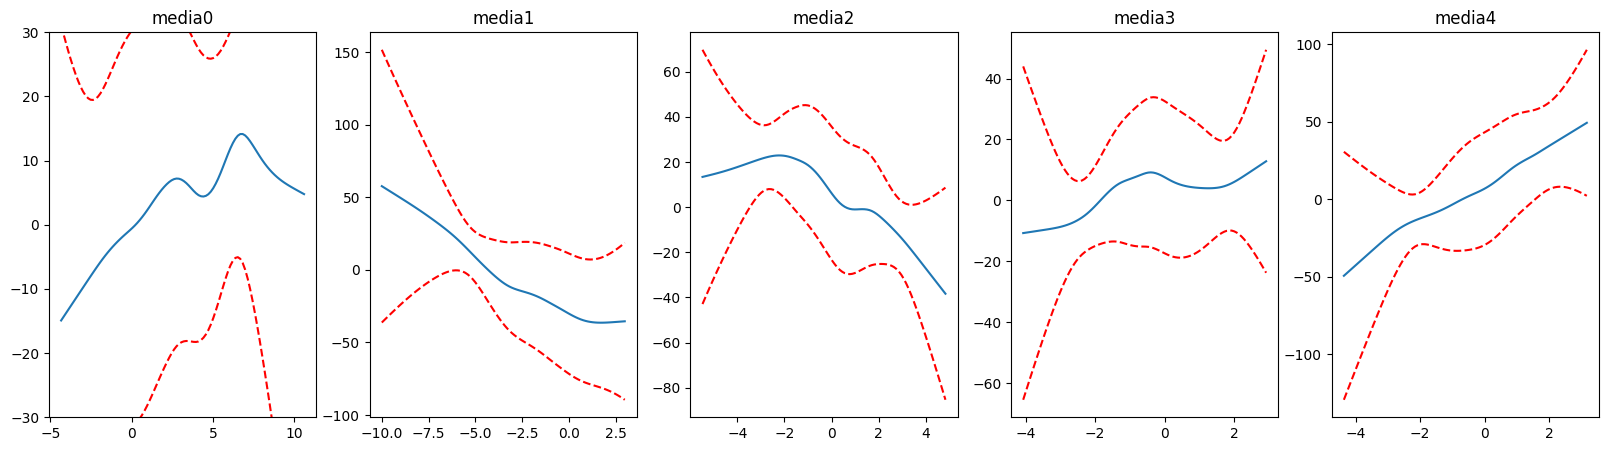

In [49]:
plot_partial_dependence(gam3,5)

https://pygam.readthedocs.io/en/latest/notebooks/quick_start.html

By default, spline terms, s() have a penalty on their 2nd derivative, which encourages the functions to be smoother, while factor terms, f() and linear terms l(), have a l2, ie ridge penalty, which encourages them to take on smaller values.

lam, short for λ, controls the strength of the regularization penalty on each term. Terms can have multiple penalties, and therefore multiple lam.

**Let’s perform a grid-search over multiple lam values to see if we can improve our model.
We will seek the model with the lowest generalized cross-validation (GCV) score.**

In [50]:
n_features = 26 # number of features used in the model
lams = np.logspace(-5,5,20) * n_features

In [51]:
gam3.gridsearch(x_train, y_train, lam=lams)

  0% (0 of 20) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  5% (1 of 20) |#                        | Elapsed Time: 0:00:10 ETA:   0:03:15
 10% (2 of 20) |##                       | Elapsed Time: 0:00:16 ETA:   0:01:53
 15% (3 of 20) |###                      | Elapsed Time: 0:00:22 ETA:   0:01:48
 20% (4 of 20) |#####                    | Elapsed Time: 0:00:29 ETA:   0:01:45
 25% (5 of 20) |######                   | Elapsed Time: 0:00:36 ETA:   0:01:40
 30% (6 of 20) |#######                  | Elapsed Time: 0:00:43 ETA:   0:01:35
 35% (7 of 20) |########                 | Elapsed Time: 0:00:49 ETA:   0:01:28
 40% (8 of 20) |##########               | Elapsed Time: 0:00:56 ETA:   0:01:21
 45% (9 of 20) |###########              | Elapsed Time: 0:01:04 ETA:   0:01:21
 50% (10 of 20) |############            | Elapsed Time: 0:01:10 ETA:   0:01:09
 55% (11 of 20) |#############           | Elapsed Time: 0:01:17 ETA:   0:01:01
 60% (12 of 20) |##############         

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + intercept,
   tol=0.0001, verbose=False)

In [53]:
gam3.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     127.632
Link Function:                        LogitLink Log Likelihood:                                    -1.8891
Number of Samples:                         1442 AIC:                                              259.0422
                                                AICc:                                              284.454
                                                UBRE:                                               2.2504
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.9976
Feature Function                  Lam

In [54]:
gam3.accuracy(x_test, y_test) #takie samo? nie wiem czy acc wywoływane znowu ma w ogóle sens

0.9722991689750693

For high-dimensional search-spaces, it is sometimes a good idea to try a randomized search.
We can acheive this by using numpy’s random module:

In [55]:
lams_rnd = np.random.rand(100, 3) # random points on [0, 1], with shape (100, 3)
lams_rnd = lams_rnd * 6 - 3 # shift values to -3, 3
lams_rnd = 10 ** lams_rnd # transforms values to 1e-3, 1e3

In [ ]:
random_gam = LogisticGAM(n_splines=26).gridsearch(x_train, y_train, lam=lams_rnd)

In [ ]:
random_gam.accuracy(x_test, y_test)

In [ ]:
random_gam.summary()

import numpy as np

lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

gam.gridsearch(X, y, lam=lams)
gam.summary()

In [36]:
from pygam import GAM, LogisticGAM, s, f, te
import numpy as np
# your training and test datasets should be split as X_train, X_test, y_train, y_test

n_features = 26 # number of features used in the model
lams = np.logspace(-5,5,20) * n_features
splines = 26 # number of splines we will use
# linear GAM for Regression
gam = LogisticGAM(
                s(0,n_splines=splines)).gridsearch(x_train_df.values, y_train_df.values,lam=lams)

gam.summary()

  0% (0 of 20) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  5% (1 of 20) |#                        | Elapsed Time: 0:00:00 ETA:  00:00:00
 10% (2 of 20) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01
 15% (3 of 20) |###                      | Elapsed Time: 0:00:00 ETA:   0:00:01
 25% (5 of 20) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 30% (6 of 20) |#######                  | Elapsed Time: 0:00:00 ETA:   0:00:00
 35% (7 of 20) |########                 | Elapsed Time: 0:00:00 ETA:   0:00:00
 40% (8 of 20) |##########               | Elapsed Time: 0:00:00 ETA:   0:00:00
 50% (10 of 20) |############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 60% (12 of 20) |##############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 65% (13 of 20) |###############         | Elapsed Time: 0:00:00 ETA:   0:00:00
 75% (15 of 20) |##################      | Elapsed Time: 0:00:00 ETA:   0:00:00
 85% (17 of 20) |####################   

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     14.5049
Link Function:                        LogitLink Log Likelihood:                                  -657.6314
Number of Samples:                         1442 AIC:                                             1344.2725
                                                AICc:                                            1344.6316
                                                UBRE:                                               2.9403
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1637
Feature Function                  Lam

C:\Users\pbirylo\AppData\Local\Temp\ipykernel_30040\1104476286.py:12: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [37]:
gam.accuracy(x_test_df,y_test_df)

0.778393351800554

In [38]:
from pygam import LogisticGAM, s, f

gam1 = LogisticGAM(s(0) + s(1) + s(2),dtype='categorical').gridsearch(x_train, y_train)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:04
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:02
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:02
 36% (4 of 11) |#########                | Elapsed Time: 0:00:01 ETA:   0:00:01
 45% (5 of 11) |###########              | Elapsed Time: 0:00:01 ETA:   0:00:01
 54% (6 of 11) |#############            | Elapsed Time: 0:00:01 ETA:   0:00:01
 63% (7 of 11) |###############          | Elapsed Time: 0:00:01 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:01 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:01 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:01 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


<Figure size 640x480 with 0 Axes>

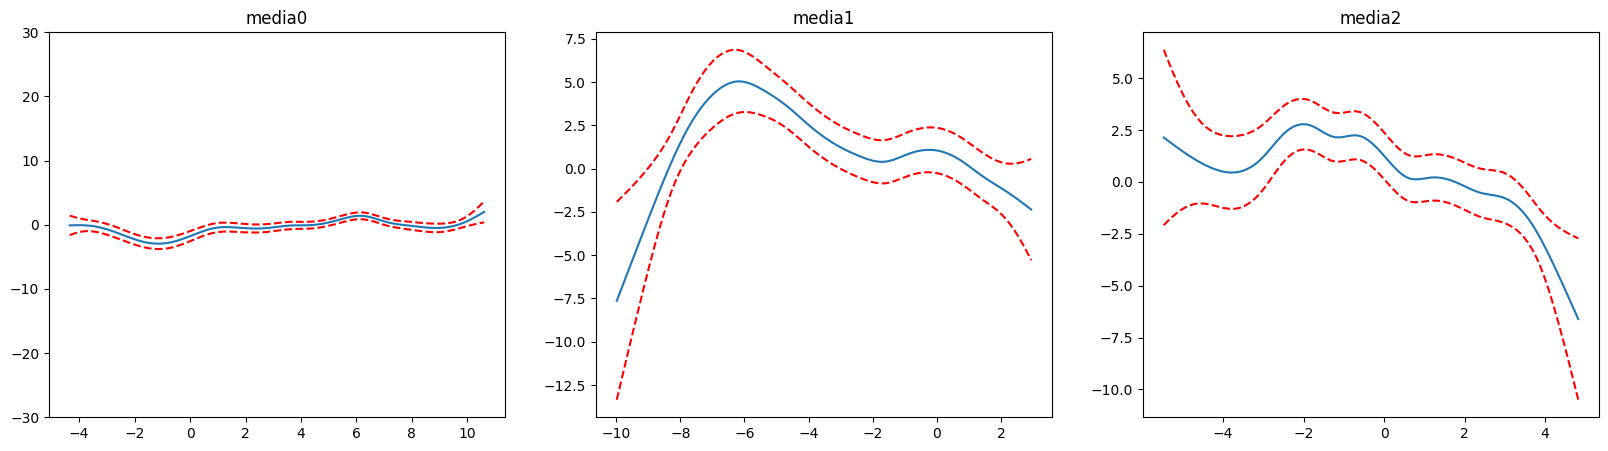

In [11]:
plot_partial_dependence(gam1,3)

In [39]:
gam1.accuracy(x_test, y_test)

0.8781163434903048

In [15]:
gam1.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     29.4093
Link Function:                        LogitLink Log Likelihood:                                  -484.0203
Number of Samples:                         1442 AIC:                                             1026.8591
                                                AICc:                                            1028.2134
                                                UBRE:                                               2.7284
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3845
Feature Function                  Lam

C:\Users\pbirylo\AppData\Local\Temp\ipykernel_30040\1772604297.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam1.summary()


In [68]:
gam4 = LogisticGAM(s(0) + s(1) + s(2) + s(3))
gam4.fit(x1_train, y1_train)

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + intercept, tol=0.0001, 
   verbose=False)

<Figure size 640x480 with 0 Axes>

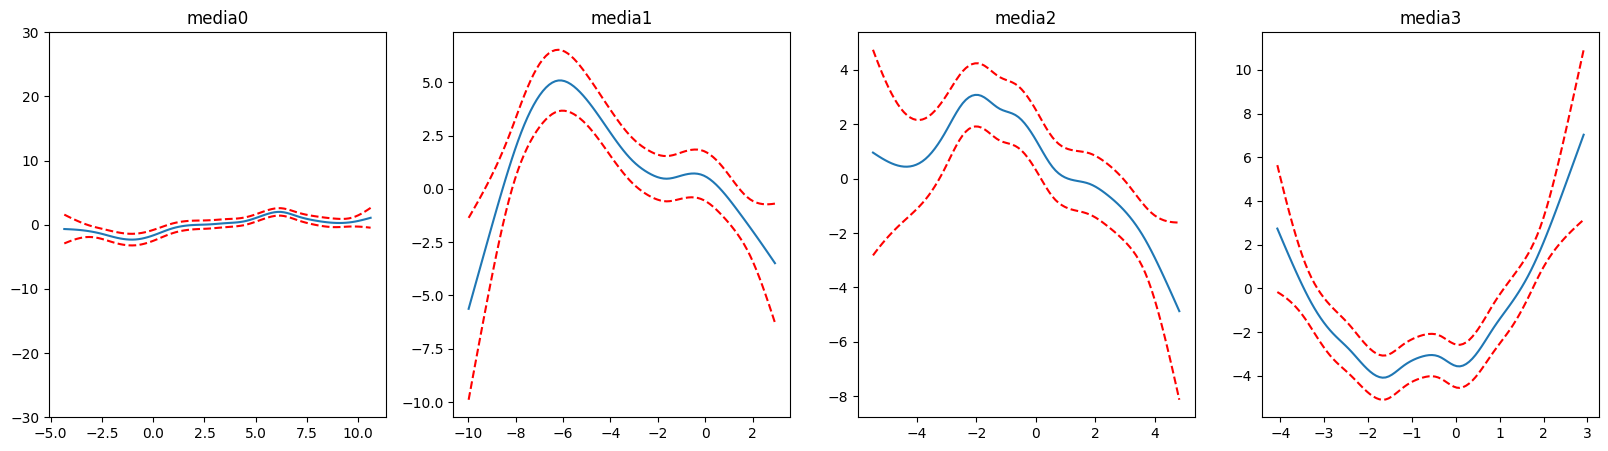

In [69]:
plot_partial_dependence(gam4,4)

In [70]:
gam4.accuracy(x1_test, y1_test)

0.8919667590027701

In [71]:
gam4.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     31.9886
Link Function:                        LogitLink Log Likelihood:                                  -425.4991
Number of Samples:                         1442 AIC:                                              914.9752
                                                AICc:                                             916.5679
                                                UBRE:                                               2.6523
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4589
Feature Function                  Lam

### Cross validation: which model is the best

In [72]:
models = {      'gam1' : gam1, 
                #'gam2' : gam2,
                'gam3': gam3, 
                'gam4': gam4 
        }

In [73]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

print('Cross validation with cv=5')
for name, model in models.items():
    scores = cross_val_score(model, x1, y1, cv=5)
    print(f'Results for {name}: Mean = {scores.mean()}, std = {scores.std()}')

print('\nCross validation with cv=10')
for name, model in models.items():
    scores = cross_val_score(model, x1, y1, cv=10)
    print(f'Results for {name}: Mean = {scores.mean()}, std = {scores.std()}')

print('\nLeave One Out Cross validation')
for name,model in models.items():
    loo = LeaveOneOut()
    scores = cross_val_score(model, x1, y1, cv=loo)
    print(f'Result for {name}: Mean = {scores.mean()}, std = {scores.std()}')

Cross validation with cv=5
Results for gam1: Mean = 0.7623268698060942, std = 0.38808221664599063
Results for gam2: Mean = 0.7623268698060942, std = 0.38808221664599063
Results for gam3: Mean = 0.7623268698060942, std = 0.38808221664599063


Results for gam4: Mean = 0.7623268698060942, std = 0.38808221664599063

Cross validation with cv=10
Results for gam1: Mean = 0.7629834254143646, std = 0.39689471061256415
Results for gam2: Mean = 0.7629834254143646, std = 0.39689471061256415
Results for gam3: Mean = 0.7629834254143646, std = 0.39689471061256415
Results for gam4: Mean = 0.7629834254143646, std = 0.39689471061256415

Leave One Out Cross validation
Result for gam1: Mean = 0.762063227953411, std = 0.42582022562888977
Result for gam2: Mean = 0.762063227953411, std = 0.42582022562888977
Result for gam3: Mean = 0.762063227953411, std = 0.42582022562888977
Result for gam4: Mean = 0.762063227953411, std = 0.42582022562888977


### Evaluation metrics

In [74]:
for name, model in models.items():
    print(f'Results for {name}: accuracy = {model.accuracy(x1_test, y1_test)}')

Results for gam1: accuracy = 0.8227146814404432
Results for gam2: accuracy = 0.9307479224376731
Results for gam3: accuracy = 0.9750692520775623
Results for gam4: accuracy = 0.8919667590027701


## 5. Decision Trees and Random Forest

### Decision Trees

We will build a decision tree model and evaluate its performance.

1.0
0.8947368421052632
[[ 72   9   9]
 [  9  60   4]
 [  6   1 191]]
              precision    recall  f1-score   support

    car_horn       0.83      0.80      0.81        90
    gun_shot       0.86      0.82      0.84        73
  jackhammer       0.94      0.96      0.95       198

    accuracy                           0.89       361
   macro avg       0.87      0.86      0.87       361
weighted avg       0.89      0.89      0.89       361



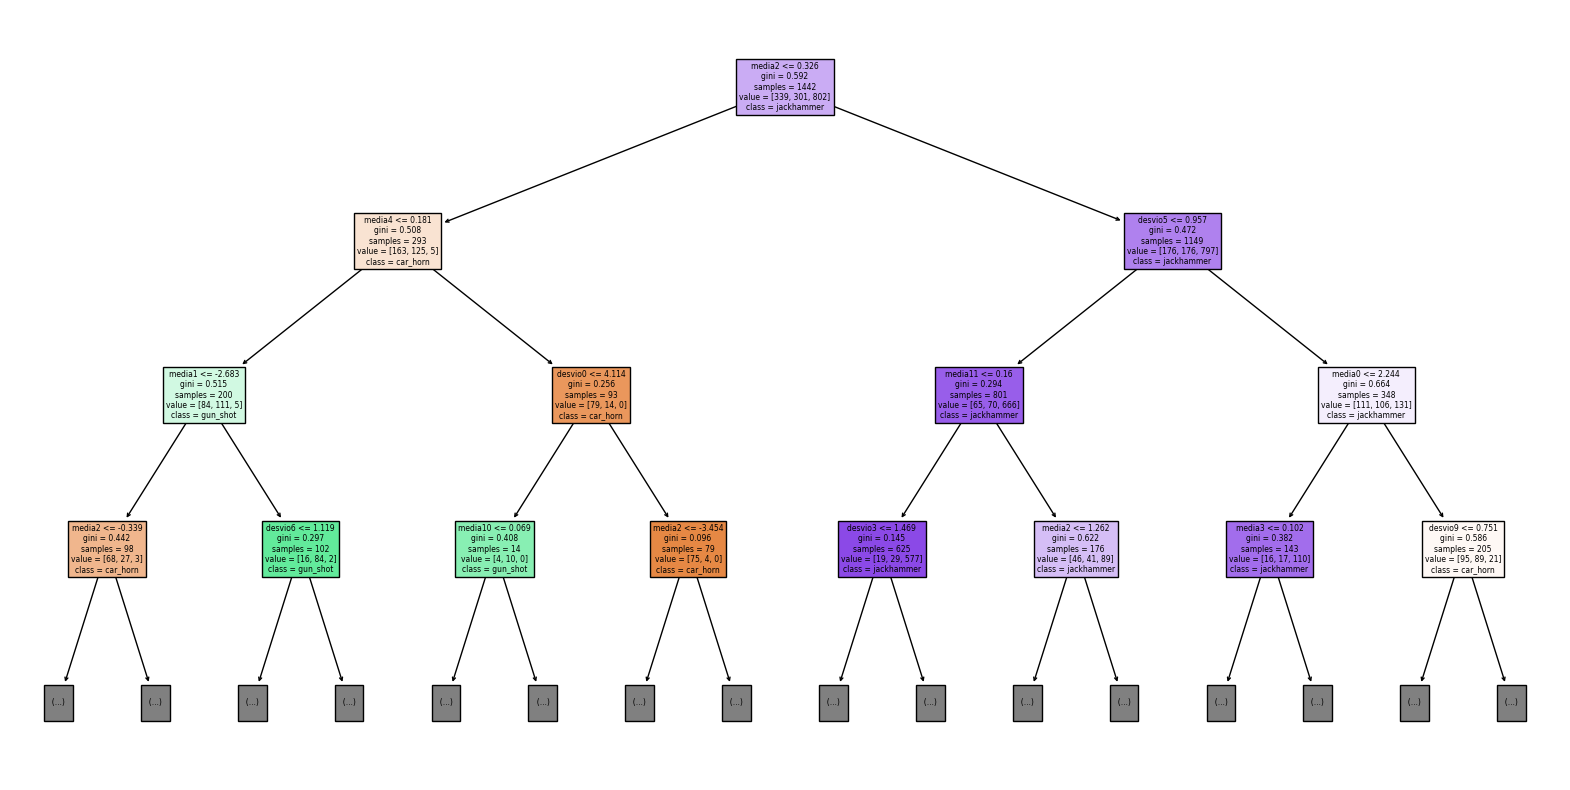

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('all.csv')



X_train, X_test, y_train, y_test = train_test_split(df.drop(['classe'], axis=1), df['classe'], test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X_train.columns, class_names=['car_horn', 'gun_shot', 'jackhammer'], filled=True, max_depth=3)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

As we can see, the result is not bad, although models like QDA and even Logistic Regression performed slightly better. Let's try to tune the Decision Tree hyperparameters to see if we can obtain better results.  
For the decision tree, we will do the hyperparameter tuning manually.

### Tuning the hyperparameters
__max_depth__

In [76]:
clf.tree_.max_depth

13

In [77]:
def decision_tree_classifier(X_train, y_train, X_test, y_test, max_depth):
    clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    print(f'Training set accuracy: {accuracy_score(y_train, y_train_pred)}')
    print(f'Test set accuracy: {accuracy_score(y_test, y_pred)}')
    print(confusion_matrix(y_test, y_pred))  
    print(classification_report(y_test, y_pred))

In [78]:
decision_tree_classifier(X_train, y_train, X_test, y_test, 3)

Training set accuracy: 0.768377253814147
Test set accuracy: 0.7645429362880887
[[ 62   7  21]
 [ 31  21  21]
 [  3   2 193]]
              precision    recall  f1-score   support

    car_horn       0.65      0.69      0.67        90
    gun_shot       0.70      0.29      0.41        73
  jackhammer       0.82      0.97      0.89       198

    accuracy                           0.76       361
   macro avg       0.72      0.65      0.66       361
weighted avg       0.75      0.76      0.74       361



Setting the max depth to 3 does not improve the result. On the contrary, the performace is worse for both train and test set.  
We know that naturally, our model has max depth of 16. We will try all the possible depths and observe the results, if we find any depth that performs better.

The highest the accuracy of 0.9030470914127424 is with depth 9


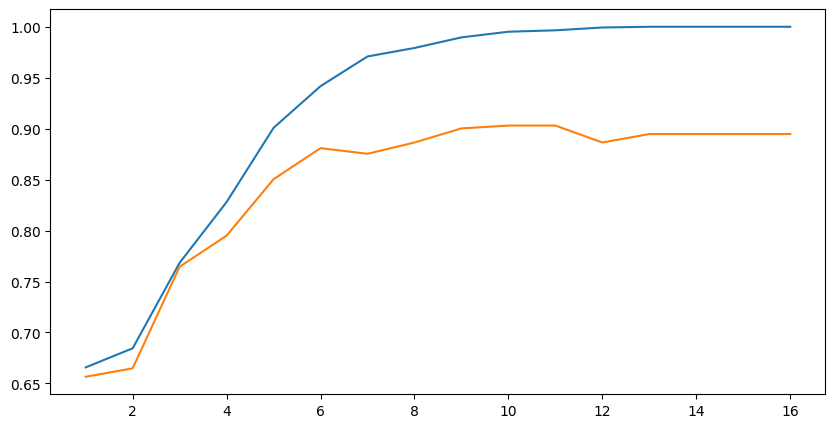

In [79]:
results = []
for i in range(1, 17):
    clf = DecisionTreeClassifier(random_state=42, max_depth=i)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    results.append((i, accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_pred)))

results_df = pd.DataFrame(results, columns=['max_depth', 'train_accuracy', 'test_accuracy'])

plt.figure(figsize=(10, 5))
plt.plot(results_df['max_depth'], results_df['train_accuracy'])
plt.plot(results_df['max_depth'], results_df['test_accuracy'])

print(f'The highest the accuracy of {results_df["test_accuracy"].max()} is with depth {results_df["test_accuracy"].idxmax()}')

The difference between accuracy before and after tuning the hyperparameter max_depth is **negligible**.  


__max_leaf_nodes__

In [80]:
clf.tree_.n_leaves

102

In [81]:
clf = DecisionTreeClassifier(random_state=42, max_leaf_nodes=50)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
print(f'Training set accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Test set accuracy: {accuracy_score(y_test, y_pred)}')

Training set accuracy: 0.957004160887656
Test set accuracy: 0.8975069252077562


Halving the number of leaves lowers both training and test set accuracy.  
Let's iterate over all the possibilities like we did with max depth and compare the results.

The highest the accuracy of 0.9030470914127424 is with 79 left nodes


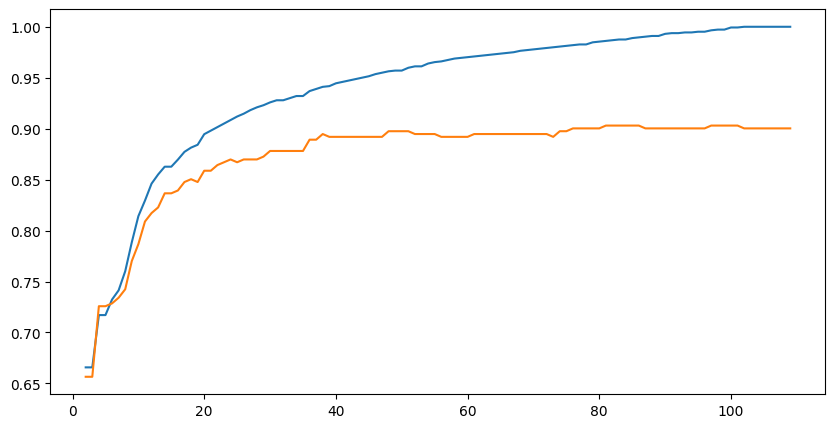

In [82]:
results = []
for i in range(2, 110):
    clf = DecisionTreeClassifier(random_state=42, max_leaf_nodes=i)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    results.append((i, accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_pred)))

results_df = pd.DataFrame(results, columns=['max_leaf_nodes', 'train_accuracy', 'test_accuracy'])

plt.figure(figsize=(10, 5))
plt.plot(results_df['max_leaf_nodes'], results_df['train_accuracy'])
plt.plot(results_df['max_leaf_nodes'], results_df['test_accuracy'])

print(f'The highest the accuracy of {results_df["test_accuracy"].max()} is with {results_df["test_accuracy"].idxmax()} left nodes')

Tuning the hyperparameter **max_leaf_nodes** gave slightly better results than **max_depth**. The improvement over default leaf number was **1 %** increase in accuracy. The max_depth gave only **0.5 %**.  
Still, the accuracy gain is small for both.

### Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(df.drop(['classe'], axis=1), df['classe'], test_size=0.2, random_state=42)
def random_forest_classifier(n_estimators):
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rfc.fit(X_train, y_train)
    y_train_pred = rfc.predict(X_train)
    y_pred = rfc.predict(X_test)
    return y_pred, y_train_pred

In [84]:
y_pred, y_train_pred = random_forest_classifier(n_estimators=100)
print(f'Training set accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Test set accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

Training set accuracy: 1.0
Test set accuracy: 0.9722991689750693
[[ 88   1   1]
 [  2  66   5]
 [  1   0 197]]


The accuracy of **96.3 %** is already a very good result. 

In [85]:
# tune the hyperparameters using grid search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 11],
    'max_features': [3, 5, 7, 9, 11]
}
rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_


{'max_depth': 11, 'max_features': 5, 'n_estimators': 300}

In [86]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=11, max_features=5, random_state=42)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_pred = rfc.predict(X_test)
print(f'Training set accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Test set accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))


Training set accuracy: 1.0
Test set accuracy: 0.9722991689750693
[[ 87   1   2]
 [  1  67   5]
 [  1   0 197]]


The result for with the 'optimal' parameters did not change, it even got even **slightly worse**. So we will use models with 100 estimators and otherwise default parameters.

[0.14097533530884573, 0.06756625655790988, 0.06280415363017024, 0.056209890295323035, 0.05300391251166423, 0.052653476719379325, 0.0475362874548921, 0.04588393712556146, 0.04192365791268522, 0.0411798818341111, 0.03796044752232439, 0.03565585184454506, 0.033687487444083244, 0.029982914095487815, 0.028542119667904965, 0.025781171353075227, 0.024330320134969857, 0.02227834629340774, 0.02200982889282732, 0.021787548158222345, 0.021013199560328995, 0.0206081034365735, 0.02047514431942742, 0.0196856162937716, 0.014437420629232851, 0.0120276910032754]


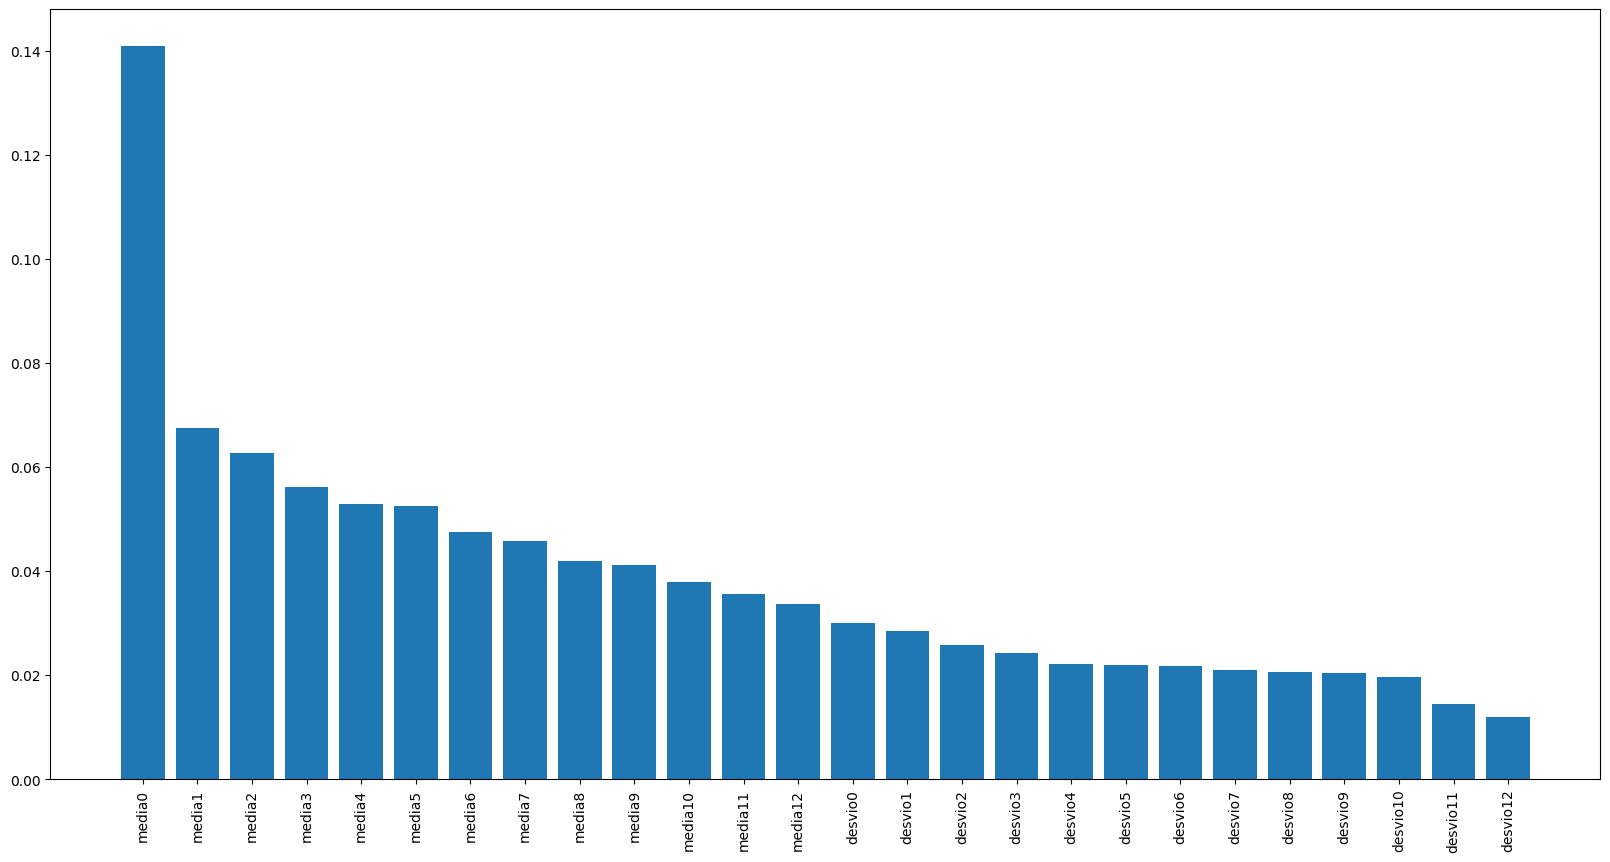

In [87]:
importances = rfc.feature_importances_.tolist()
importances.sort(reverse=True)
print(importances)
plt.figure(figsize=(20, 10))
plt.bar(X_train.columns, importances)
plt.xticks(rotation=90)
plt.show()


When we inspect the result we see something unusual; **the feature importance order is the same as the feature order**!  
We will reverse the order of features and see it the result is the same.

Training set accuracy: 1.0
Test set accuracy: 0.9695290858725761
[[ 86   2   2]
 [  2  66   5]
 [  0   0 198]]
[0.13728114044532935, 0.06415986131687548, 0.06050089232888475, 0.058912297978454674, 0.054690007245186294, 0.053712243887408036, 0.04906033262712591, 0.04541577799863724, 0.043648388263389, 0.041144977802113764, 0.038337869315491505, 0.03766072008270226, 0.03242731009101885, 0.03040808811079973, 0.029521463584057044, 0.024797423720756565, 0.022643873111121184, 0.02188962853618808, 0.021625928068751774, 0.021448922927537573, 0.02096463998208318, 0.020573438561609154, 0.020146995242435736, 0.019704183367510654, 0.016340756547953014, 0.012982838856579294]


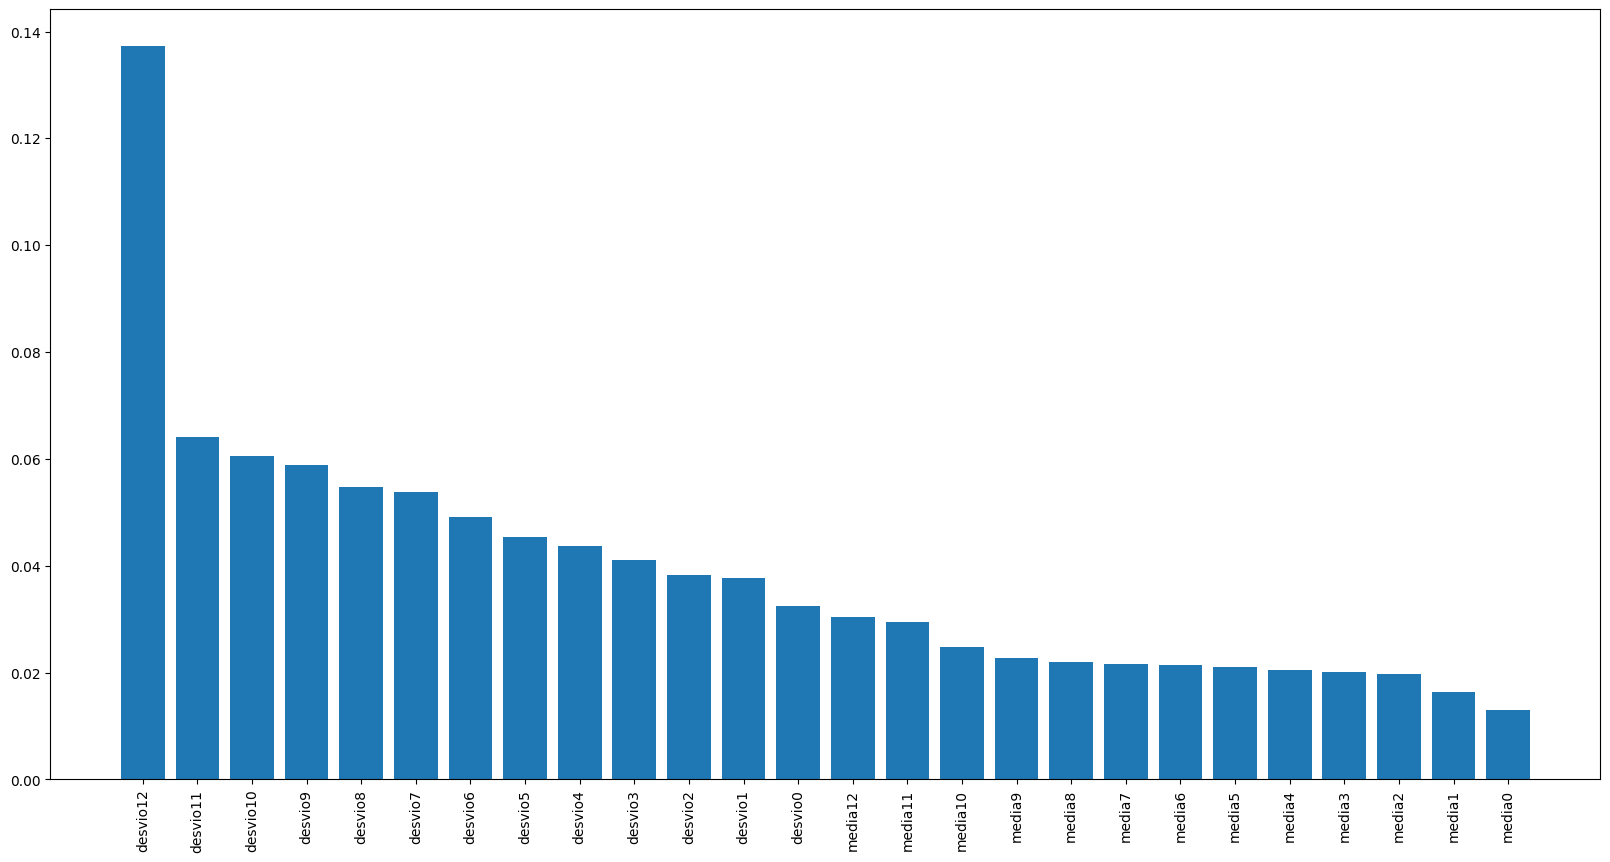

In [88]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=11, max_features=5, random_state=42)
X_train = X_train.iloc[:, ::-1]
X_test = X_test.iloc[:, ::-1]
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_pred = rfc.predict(X_test)
print(f'Training set accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Test set accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
importances = rfc.feature_importances_.tolist()
importances.sort(reverse=True)
print(importances)
plt.figure(figsize=(20, 10))
plt.bar(X_train.columns, importances)
plt.xticks(rotation=90)
plt.show()

So the feature importance **is the same as the feature order**. This is because *Impurity-based feature importances can be misleading for high cardinality features (many unique values), source: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html*  
We should instead use a **Permutation feature importance**. Let's see the results using this method.

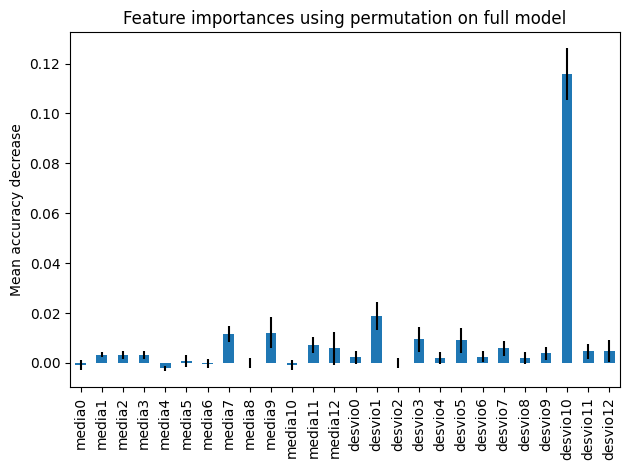

In [89]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=df.columns[:-1])
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

The results are very different. We can see the **desvio10** is the most important feature for this model.  
- This does not exactly correlate with what we found in the EDA. Our observations there are that **media3** and **desvio3** would be the most important features when differentiating the classes.  
- In the Feature Selection section, we ...............
## TODO how does this relate to the finding in the FEATURE SELECTION section?

## 6. Support Vector Machine (SVM)

Using SVMs, build a classification model that allows you to differentiate the classes under analysis.
In this task you must: <br>
• Test all possible kernels;<br>
• Tune the SVM hyperparameters, ensuring that your model is not overfitting the training
data;<br>
• Present the SVM model with the best performance on your data, justifying the choice (you
should use results from models used in previous tasks to justify your answer).<br>


### Binary classification

### Reduce dimensionality - only 2 features (to be able to mess with 2D visualizations)

In its most simple type, SVM doesn’t support multiclass classification natively. It supports binary classification, so let's start with it.<br>
We're going to predict of sound is carn horn or not.

In [90]:
import pandas as pd
df = pd.read_csv('all.csv')

df['classe'].mask(df['classe'] == 'car_horn', 1, inplace=True) 
df['classe'].mask(df['classe'] == 'gun_shot', 0, inplace=True)
df['classe'].mask(df['classe'] == 'jackhammer', 0, inplace=True)

df['classe'].unique()

array([1, 0], dtype=object)

In [91]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['classe'], axis=1), df['classe'], test_size=0.2, random_state=42)

In [92]:
x_train.shape, y_train.shape

((1442, 26), (1442,))

In [93]:
x_test.shape, y_test.shape

((361, 26), (361,))

In [94]:
type(x_train)


pandas.core.frame.DataFrame

Let's take 2 features as the good starting point.

In [95]:
x_train_2_df = x_train[['desvio2', 'media0']]  # Only use first two features (sepal length and sepal width).
x_test_2_df = x_test[['desvio2', 'media0']]

In [96]:
x_train_2_df

,desvio2,media0
1247,2.645069,5.628850
1554,1.964270,8.542476
544,1.676687,7.759522
820,3.429554,2.057372
862,1.172294,-2.000964
...,...,...
1130,1.991461,5.737583
1294,1.171484,-0.990014
860,1.119957,-2.295961
1459,0.935560,9.200521


Now convert them to numpy to avoid problems in future.

In [97]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy() 
x_test = x_test.to_numpy() 

x_train_2 = x_train_2_df.to_numpy()
x_test_2 = x_test_2_df.to_numpy()

In [98]:
type(x_train)

numpy.ndarray

In [99]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [100]:
type(y_train)

numpy.ndarray

In [101]:
y_train = y_train.astype('int') #so SVC wont scream we're trying to fit regression into classification model
y_test = y_test.astype('int')

In [102]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [103]:
x_train_2

array([[ 2.645069,  5.62885 ],
       [ 1.96427 ,  8.542476],
       [ 1.676687,  7.759522],
       ...,
       [ 1.119957, -2.295961],
       [ 0.93556 ,  9.200521],
       [ 2.244852,  5.39338 ]])

In [104]:
# Standardize *** NOTE ***
# Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if 
# the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler

scalar_2 = StandardScaler().fit(x_train_2)
x_train_transformed_2 = scalar_2.transform(x_train_2)
x_test_transformed_2 = scalar_2.transform(x_test_2)

In [105]:
x_train_transformed_2[:100]

array([[ 0.89649935,  0.59683124],
       [ 0.1608601 ,  1.40900374],
       [-0.14988851,  1.19075552],
       [ 1.7441768 , -0.39871733],
       [-0.69491177, -1.52997745],
       [-0.52000053, -0.9313267 ],
       [ 1.03259173,  0.67223918],
       [-0.21761   , -1.07791505],
       [ 0.8528515 , -0.50036677],
       [-0.16219925,  0.2872476 ],
       [ 0.63378023,  1.02025768],
       [ 1.22740999, -0.14589494],
       [-0.56217018, -0.92729625],
       [-0.72102765,  0.40155478],
       [ 0.31556068,  0.57222238],
       [-0.22402632,  0.88910147],
       [ 1.45962295,  0.80446635],
       [ 0.34029561,  0.74074026],
       [ 2.86141542, -0.44882511],
       [-0.53390508, -0.08818928],
       [ 1.40611722, -0.34015396],
       [-0.07810739, -0.99631971],
       [ 1.19524734,  0.33292827],
       [-0.7139014 , -1.36059377],
       [-0.47790327,  1.62457597],
       [-0.94419421, -1.67602921],
       [-0.50899726, -0.61302766],
       [ 3.59039739, -0.49445951],
       [-0.05112275,

In [106]:
x_train_2[:, 0]

array([2.645069, 1.96427 , 1.676687, ..., 1.119957, 0.93556 , 2.244852])

Text(0, 0.5, 'media0')

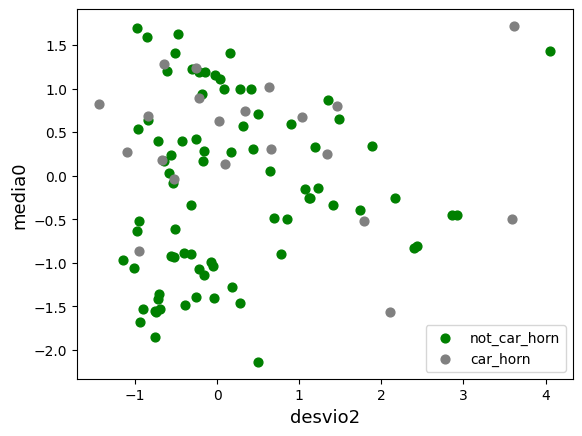

In [107]:
import numpy as np
import matplotlib.pyplot as plt


scatter_x = x_train_transformed_2[:, 0]
scatter_y = x_train_transformed_2[:, 1]

cdict = {0: 'green', 1: 'grey'}

# Generate scatter plot with legend.
for c_label in np.unique(y_train[:100]):
    if c_label == 0:
        iris = 'not_car_horn'
    if c_label == 1:
        iris = 'car_horn'
    
    ix = np.where(y_train[:100] == c_label)
    plt.scatter(scatter_x[ix], scatter_y[ix], c = cdict[c_label], label = iris, s = 40)
    
plt.legend()
plt.xlabel("desvio2", fontsize = 13)
plt.ylabel("media0", fontsize = 13)

In [108]:
r = np.exp(-(x_train_transformed_2[:100] ** 2).sum(1))

In [109]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, x_train_transformed=x_train_transformed_2[:100], y_train=y_train[:100]):
    
    ax = plt.subplot(projection='3d')
    ax.scatter3D(x_train_transformed[:, 0], x_train_transformed[:, 1],r, c=y_train, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         x_train_transformed=fixed(x_train_transformed_2[:100]), y_train=fixed(y_train[:100]))

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

<function __main__.plot_3D(elev=30, azim=30, x_train_transformed=array([[ 0.89649935,  0.59683124],
       [ 0.1608601 ,  1.40900374],
       [-0.14988851,  1.19075552],
       [ 1.7441768 , -0.39871733],
       [-0.69491177, -1.52997745],
       [-0.52000053, -0.9313267 ],
       [ 1.03259173,  0.67223918],
       [-0.21761   , -1.07791505],
       [ 0.8528515 , -0.50036677],
       [-0.16219925,  0.2872476 ],
       [ 0.63378023,  1.02025768],
       [ 1.22740999, -0.14589494],
       [-0.56217018, -0.92729625],
       [-0.72102765,  0.40155478],
       [ 0.31556068,  0.57222238],
       [-0.22402632,  0.88910147],
       [ 1.45962295,  0.80446635],
       [ 0.34029561,  0.74074026],
       [ 2.86141542, -0.44882511],
       [-0.53390508, -0.08818928],
       [ 1.40611722, -0.34015396],
       [-0.07810739, -0.99631971],
       [ 1.19524734,  0.33292827],
       [-0.7139014 , -1.36059377],
       [-0.47790327,  1.62457597],
       [-0.94419421, -1.67602921],
       [-0.50899726, -0.6

Train SVC for 2 features, plot the decision boundary

In [110]:
def plot_decision_boundary(X, y, model, is_svm):
    scatter_x = X[:, 0]
    scatter_y = X[:, 1]

    cdict = {0: 'green', 1: 'grey'}

    for c_label in np.unique(y):
        if c_label == 0:
            iris = 'not_car_horn'
        if c_label == 1:
            iris = 'car_horn'

        ix = np.where(y == c_label)
        plt.scatter(scatter_x[ix], scatter_y[ix], c = cdict[c_label], label = iris, s = 40)
        
    plt.legend()
    plt.xlabel("desvio2", fontsize = 13)
    plt.ylabel("media0", fontsize = 13)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid.
    xx = np.linspace(xlim[0], xlim[1], 40)
    yy = np.linspace(ylim[0], ylim[1], 40)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)  # Use model decision function to plot boundary.
    
    if is_svm == True:
        # Plot decision boundary and margins.
        ax.contour(XX, YY, Z, colors = 'r', levels = [-1, 0, 1], 
                   linestyles=['--', '-', '--'])
        
        # Plot support vectors.
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s = 100, linewidth = 1, facecolors = 'none', edgecolors = 'k')
    else:
        ax.contour(XX, YY, Z, colors = 'r', levels = [0], 
                   linestyles=['-'])
        
    plt.show()


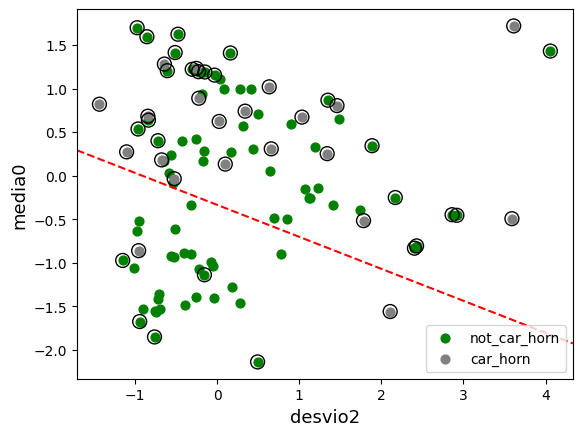

In [111]:
from sklearn.svm import SVC

svc_2 = SVC(kernel = 'linear', C = 10, random_state = 123)
svc_2.fit(x_train_transformed_2[:100], y_train[:100])

plot_decision_boundary(x_train_transformed_2[:100], y_train[:100], svc_2, True)

### NOW WITH ALL FEATURES

Let's find out for which hyperparemeters SVC is the best.

In [112]:
# from sklearn.svm import SVC # "Support vector classifier"
# model = SVC(kernel='rbf', C=2)
# model.fit(x_train, y_train)

In [113]:
# Standardize *** NOTE ***
# Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if 
# the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler().fit(x_train)
x_train_transformed = scalar.transform(x_train)
x_test_transformed = scalar.transform(x_test)

In [114]:
# Cross validation for hyper-parameter tuning
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.model_selection import cross_validate
from prettytable import PrettyTable



hyperparameter_score_list = []
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for c in np.arange(0.5,3,0.5):
        svm = SVC(kernel=kernel, C=c)
        scores = cross_validate(svm, x_train_transformed, y_train, cv=10, scoring='accuracy')
        mean_score = np.mean(scores['test_score'])
        hyperparameter_score_list.append([kernel, c, mean_score])
# Choose the hyper-parameters (with highest average accuracy)
myTable = PrettyTable(["Kernel", "C", "Avg accuracy"])
for row in hyperparameter_score_list:
    myTable.add_row([row[0], row[1], round(row[2],3)])
print(myTable)

+---------+-----+--------------+
|  Kernel |  C  | Avg accuracy |
+---------+-----+--------------+
|  linear | 0.5 |    0.936     |
|  linear | 1.0 |    0.939     |
|  linear | 1.5 |    0.938     |
|  linear | 2.0 |    0.938     |
|  linear | 2.5 |    0.937     |
|   poly  | 0.5 |    0.915     |
|   poly  | 1.0 |    0.925     |
|   poly  | 1.5 |    0.937     |
|   poly  | 2.0 |    0.943     |
|   poly  | 2.5 |    0.951     |
|   rbf   | 0.5 |    0.964     |
|   rbf   | 1.0 |    0.975     |
|   rbf   | 1.5 |    0.977     |
|   rbf   | 2.0 |    0.979     |
|   rbf   | 2.5 |    0.979     |
| sigmoid | 0.5 |    0.836     |
| sigmoid | 1.0 |    0.818     |
| sigmoid | 1.5 |    0.807     |
| sigmoid | 2.0 |    0.804     |
| sigmoid | 2.5 |     0.8      |
+---------+-----+--------------+


In [115]:
model = SVC(kernel='rbf', C=2).fit(x_train_transformed, y_train)

Evaluation

In [116]:
type(x_test)

numpy.ndarray

In [117]:
x_test.shape

(361, 26)

In [118]:
x_test_df = pd.DataFrame(x_test)

In [119]:
x_test_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-2.169431,-3.242249,1.134315,-0.011477,0.143418,-0.302375,0.530270,-0.511100,0.442784,-0.346039,...,0.581880,0.508608,0.749021,0.455792,0.947301,0.345326,0.791178,0.490276,0.556751,0.384320
1,6.506867,-3.558900,0.975729,-1.136765,-0.223183,0.157608,-0.016254,0.458718,0.692418,0.405521,...,1.698894,1.432692,0.783452,1.088217,0.827638,0.701823,0.611028,0.724408,0.576200,0.513573
2,2.280447,-2.005389,2.713043,-0.670813,0.851014,-0.716458,0.891665,0.215993,0.604434,0.261332,...,1.187611,0.599819,1.251150,0.645888,0.436023,0.414987,0.308582,0.305940,0.430392,0.275280
3,5.785819,-1.474023,-0.137663,-0.855490,1.516226,-0.266032,0.257395,-0.206827,-0.587719,-0.731799,...,2.196187,0.616009,1.591483,1.121677,1.608795,1.899925,2.043248,1.462039,0.845884,0.388286
4,5.779821,1.729906,-0.906209,0.723172,0.443718,0.573242,0.166927,-0.016173,0.018743,0.054278,...,1.091165,0.846803,0.937273,0.586793,0.425843,0.407108,0.459816,0.347681,0.328907,0.313513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2.413555,-3.765670,-0.680689,-2.578183,-0.174829,-1.498762,-0.780426,-0.857060,-0.885653,-0.313134,...,2.041654,0.710724,0.991607,0.426477,0.491011,0.507114,0.650996,0.480392,0.591783,0.384986
357,-0.422679,-1.603328,1.175581,-0.712957,1.570683,0.401064,0.530502,0.236345,0.639060,-0.253234,...,0.749411,1.728680,0.627195,0.757914,0.512116,0.833202,0.342623,0.532494,0.316809,0.314911
358,4.137610,-1.627517,0.961251,-1.806092,-0.751358,-0.930254,-0.967379,-0.814335,0.244769,-0.730821,...,1.549010,0.558168,0.725068,0.750871,0.607902,0.611860,0.554549,0.597501,0.474031,0.321187
359,1.451881,-1.021882,2.221407,-1.516258,-0.381012,-0.943242,0.508946,-0.640859,-0.684332,-0.578544,...,1.331061,0.487981,0.786456,0.835518,0.551161,0.655997,0.459057,0.447800,0.558738,0.358068


In [120]:
results_comparison = pd.DataFrame()
results_comparison['Predicted class'] = model.predict(x_test_df)
results_comparison['Actual class'] = y_test.copy()

sound_encode = {0: 'not_car_horn', 1: 'car_horn'}

results_comparison['Predicted class'] = results_comparison['Predicted class'].map(sound_encode)
results_comparison['Actual class'] = results_comparison['Actual class'].map(sound_encode)

# View examples of the predictions compared to actual Iris.
results_comparison.head(20)

,Predicted class,Actual class
0,car_horn,not_car_horn
1,car_horn,not_car_horn
2,car_horn,not_car_horn
3,car_horn,car_horn
4,car_horn,not_car_horn
5,car_horn,car_horn
6,car_horn,not_car_horn
7,car_horn,car_horn
8,car_horn,not_car_horn
9,car_horn,not_car_horn


In [121]:
results_comparison.describe

<bound method NDFrame.describe of     Predicted class  Actual class
0          car_horn  not_car_horn
1          car_horn  not_car_horn
2          car_horn  not_car_horn
3          car_horn      car_horn
4          car_horn  not_car_horn
..              ...           ...
356        car_horn      car_horn
357    not_car_horn  not_car_horn
358        car_horn  not_car_horn
359    not_car_horn  not_car_horn
360        car_horn  not_car_horn

[361 rows x 2 columns]>

In [122]:
results_comparison['que'] = results_comparison['Actual class'].where((results_comparison['Actual class'] != results_comparison['Predicted class']))


In [123]:
results_comparison.dropna(inplace=True)
results_comparison


,Predicted class,Actual class,que
0,car_horn,not_car_horn,not_car_horn
1,car_horn,not_car_horn,not_car_horn
2,car_horn,not_car_horn,not_car_horn
4,car_horn,not_car_horn,not_car_horn
6,car_horn,not_car_horn,not_car_horn
...,...,...,...
351,car_horn,not_car_horn,not_car_horn
353,car_horn,not_car_horn,not_car_horn
355,car_horn,not_car_horn,not_car_horn
358,car_horn,not_car_horn,not_car_horn


In [124]:
acc = (361-len(results_comparison))/361
acc

0.4182825484764543

In [125]:
score = model.score(x_test, y_test)

print('Accuracy: {:.0f}%'.format(score * 100))

Accuracy: 42%


In [126]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

predicted = model.predict(x_test_df)

accuracy = accuracy_score(y_test, predicted)
f1 = f1_score(y_test, predicted, average='weighted')

print('Accuracy: ', "%.2f" % (accuracy*100))
print('F1: ', "%.2f" % (f1*100))

Accuracy:  41.83
F1:  39.09


one class classification: to be upgraded and cleaned up 

### Multiclass classification

### One-To-Rest approach

It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.

Binary Classification Problem 1: car_horn vs [gun_shot, jackhammer] <br>
Binary Classification Problem 2: gun_shot vs [car_horn, jackhammer] <br>
Binary Classification Problem 3: jackhammer vs [car_horn, gun_shot] <br>

In [127]:
model_ovr = SVC(kernel='rbf', C=2, decision_function_shape='ovr').fit(x_train_transformed, y_train)

In [128]:
score = model_ovr.score(x_test, y_test)

print('Accuracy: {:.0f}%'.format(score * 100))

Accuracy: 42%


In [129]:
hyperparameter_score_list = []
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for c in np.arange(0.5,3,0.5):
        svm = SVC(kernel=kernel, C=c, decision_function_shape='ovr')
        scores = cross_validate(svm, x_train_transformed, y_train, cv=300, scoring='accuracy')
        mean_score = np.mean(scores['test_score'])
        hyperparameter_score_list.append([kernel, c, mean_score])
# Choose the hyper-parameters (with highest average accuracy)
myTable = PrettyTable(["Kernel", "C", "Avg accuracy"])
for row in hyperparameter_score_list:
    myTable.add_row([row[0], row[1], round(row[2],3)])
print(myTable)

+---------+-----+--------------+
|  Kernel |  C  | Avg accuracy |
+---------+-----+--------------+
|  linear | 0.5 |    0.939     |
|  linear | 1.0 |     0.94     |
|  linear | 1.5 |    0.938     |
|  linear | 2.0 |    0.938     |
|  linear | 2.5 |    0.938     |
|   poly  | 0.5 |    0.916     |
|   poly  | 1.0 |    0.931     |
|   poly  | 1.5 |    0.941     |
|   poly  | 2.0 |    0.949     |
|   poly  | 2.5 |    0.953     |
|   rbf   | 0.5 |    0.966     |
|   rbf   | 1.0 |    0.974     |
|   rbf   | 1.5 |    0.978     |
|   rbf   | 2.0 |     0.98     |
|   rbf   | 2.5 |     0.98     |
| sigmoid | 0.5 |    0.834     |
| sigmoid | 1.0 |    0.817     |
| sigmoid | 1.5 |    0.808     |
| sigmoid | 2.0 |    0.809     |
| sigmoid | 2.5 |    0.811     |
+---------+-----+--------------+


### One-To-One approach

każdy z każdym

In [130]:
model_ovo = SVC(kernel='rbf', C=2, decision_function_shape='ovo').fit(x_train_transformed, y_train)

In [131]:
score = model_ovr.score(x_test, y_test)

print('Accuracy: {:.0f}%'.format(score * 100))

Accuracy: 42%


In [132]:
y_train.shape

(1442,)

In [133]:
hyperparameter_score_list = []
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for c in np.arange(0.5,3,0.5):
        svm = SVC(kernel=kernel, C=c, decision_function_shape='ovo')
        scores = cross_validate(svm, x_train_transformed, y_train, cv=10, scoring='accuracy')
        mean_score = np.mean(scores['test_score'])
        hyperparameter_score_list.append([kernel, c, mean_score])
# Choose the hyper-parameters (with highest average accuracy)
myTable = PrettyTable(["Kernel", "C", "Avg accuracy"])
for row in hyperparameter_score_list:
    myTable.add_row([row[0], row[1], round(row[2],3)])
print(myTable)

+---------+-----+--------------+
|  Kernel |  C  | Avg accuracy |
+---------+-----+--------------+
|  linear | 0.5 |    0.936     |
|  linear | 1.0 |    0.939     |
|  linear | 1.5 |    0.938     |
|  linear | 2.0 |    0.938     |
|  linear | 2.5 |    0.937     |
|   poly  | 0.5 |    0.915     |
|   poly  | 1.0 |    0.925     |
|   poly  | 1.5 |    0.937     |
|   poly  | 2.0 |    0.943     |
|   poly  | 2.5 |    0.951     |
|   rbf   | 0.5 |    0.964     |
|   rbf   | 1.0 |    0.975     |
|   rbf   | 1.5 |    0.977     |
|   rbf   | 2.0 |    0.979     |
|   rbf   | 2.5 |    0.979     |
| sigmoid | 0.5 |    0.836     |
| sigmoid | 1.0 |    0.818     |
| sigmoid | 1.5 |    0.807     |
| sigmoid | 2.0 |    0.804     |
| sigmoid | 2.5 |     0.8      |
+---------+-----+--------------+


## 7. Principal component analysis (PCA)

We will use the PCA to perform an indirect **feature selection**.  
We will then compare the results of some models with all features and then only the selected ones, to see if the results are improved.

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('all.csv')

X_train, X_test, y_train, y_test = train_test_split(df.drop(['classe'], axis=1), df['classe'], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
print(f'Number of features: {pca.n_features_}')
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

Number of features: 26


In [139]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='rbf', C=2)
svm.fit(X_train_transformed, y_train)
y_pred = svm.predict(X_test_transformed)
print('Results for SVM:')
print('Accuracy with 2 components: {:.0f}%'.format(accuracy_score(y_test, y_pred) * 100))

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy with original data: {:.0f}%'.format(accuracy_score(y_test, y_pred) * 100))

Results for SVM:
Accuracy with 2 components: 74%
Accuracy with original data: 99%


In [141]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_transformed, y_train)
y_pred = rf.predict(X_test_transformed)
print('Results from Random Forest Classifier:')
print('Accuracy with 2 components: {:.0f}%'.format(accuracy_score(y_test, y_pred) * 100))

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy with original data: {:.0f}%'.format(accuracy_score(y_test, y_pred) * 100))

Results from Random Forest Classifier:
Accuracy with 2 components: 75%
Accuracy with original data: 96%


In [142]:
for i in range(1, 13):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_transformed = pca.transform(X_train)
    X_test_transformed = pca.transform(X_test)
    svm = SVC(kernel='rbf', C=2)
    svm.fit(X_train_transformed, y_train)
    y_pred = svm.predict(X_test_transformed)
    print(f'Accuracy with {pca.n_components_} components: {accuracy_score(y_test, y_pred) * 100:.0f}%')

Accuracy with 1 components: 69%
Accuracy with 2 components: 74%
Accuracy with 3 components: 86%
Accuracy with 4 components: 91%
Accuracy with 5 components: 93%
Accuracy with 6 components: 92%
Accuracy with 7 components: 94%
Accuracy with 8 components: 96%
Accuracy with 9 components: 96%
Accuracy with 10 components: 97%
Accuracy with 11 components: 97%
Accuracy with 12 components: 97%


We **do not achieve better results** when using Principal Component Analysis, even when varying the number components.